# Momentum Indicators with TA-Lib in Jupyter Notebook

This notebook demonstrates various **Momentum Indicators** provided by the [TA-Lib](https://mrjbq7.github.io/ta-lib/) library. Each section includes a description of the function, the code to compute it, and a corresponding chart.

## Table of Contents
1. [Setup](#Setup)
2. [Average Directional Movement Index (ADX)](#ADX)
3. [Average Directional Movement Index Rating (ADXR)](#ADXR)
4. [Absolute Price Oscillator (APO)](#APO)
5. [Aroon](#AROON)
6. [Aroon Oscillator (AROONOSC)](#AROONOSC)
7. [Balance Of Power (BOP)](#BOP)
8. [Commodity Channel Index (CCI)](#CCI)
9. [Chande Momentum Oscillator (CMO)](#CMO)
10. [Directional Movement Index (DX)](#DX)
11. [Moving Average Convergence/Divergence (MACD)](#MACD)
12. [MACD with Controllable MA Type (MACDEXT)](#MACDEXT)
13. [Moving Average Convergence/Divergence Fix 12/26 (MACDFIX)](#MACDFIX)
14. [Money Flow Index (MFI)](#MFI)
15. [Minus Directional Indicator (MINUS_DI)](#MINUS_DI)
16. [Minus Directional Movement (MINUS_DM)](#MINUS_DM)
17. [Momentum (MOM)](#MOM)
18. [Plus Directional Indicator (PLUS_DI)](#PLUS_DI)
19. [Plus Directional Movement (PLUS_DM)](#PLUS_DM)
20. [Percentage Price Oscillator (PPO)](#PPO)
21. [Rate of Change (ROC)](#ROC)
22. [Rate of Change Percentage (ROCP)](#ROCP)
23. [Rate of Change Ratio (ROCR)](#ROCR)
24. [Rate of Change Ratio 100 Scale (ROCR100)](#ROCR100)
25. [Relative Strength Index (RSI)](#RSI)
26. [Stochastic (STOCH)](#STOCH)
27. [Stochastic Fast (STOCHF)](#STOCHF)
28. [Stochastic Relative Strength Index (STOCHRSI)](#STOCHRSI)
29. [1-day Rate-Of-Change of a Triple Smooth EMA (TRIX)](#TRIX)
30. [Ultimate Oscillator (ULTOSC)](#ULTOSC)
31. [Williams' %R (WILLR)](#WILLR)

---

In [31]:
!pip install wget
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib/
!./configure --prefix=$HOME
!make
!make install

!TA_LIBRARY_PATH=~/lib TA_INCLUDE_PATH=~/include pip install ta-lib

zsh:1: command not found: wget
tar: Error opening archive: Failed to open 'ta-lib-0.4.0-src.tar.gz'
[Errno 2] No such file or directory: 'ta-lib/'
/Users/loicmancino/PycharmProjects/scientificProject2/notebooks/ta-libs
zsh:1: no such file or directory: ./configure
make: *** No targets specified and no makefile found.  Stop.


/Users/loicmancino/PycharmProjects/scientificProject2/.venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


make: *** No rule to make target `install'.  Stop.


In [32]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import talib
from IPython.display import display, Markdown

%matplotlib inline

In [33]:
# Download sample data
data = yf.download('BTC-USD', start='2023-01-01', end='2024-09-17')
data = data[['Close', 'High', 'Low', 'Open', 'Volume']]
data.dropna(inplace=True)
# Display the first few rows
data.head()

[*********************100%***********************]  1 of 1 completed
/var/folders/vk/f0zqgnwn4kbbspdxkgd84my00000gn/T/ipykernel_6572/4051834836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Close          High           Low          Open  \
Date                                                                 
2023-01-01  16625.080078  16630.439453  16521.234375  16547.914062   
2023-01-02  16688.470703  16759.343750  16572.228516  16625.509766   
2023-01-03  16679.857422  16760.447266  16622.371094  16688.847656   
2023-01-04  16863.238281  16964.585938  16667.763672  16680.205078   
2023-01-05  16836.736328  16884.021484  16790.283203  16863.472656   

                 Volume  
Date                     
2023-01-01   9244361700  
2023-01-02  12097775227  
2023-01-03  13903079207  
2023-01-04  18421743322  
2023-01-05  13692758566

In [34]:
def compute_and_plot_indicators(data, indicators):
    
    """
    Calcule et trace une liste d'indicateurs techniques définis avec descriptions.

    Parameters:
    - data (pd.DataFrame): DataFrame contenant les données boursières avec colonnes nécessaires.
    - indicators (list): Liste de dictionnaires définissant chaque indicateur à calculer et tracer.
    """
    print(f"Nombre d'indicateurs: {len(indicators)}")
    for indicator in indicators:
        name = indicator['name']
        description = indicator.get('description', 'Aucune description disponible.')
        func = indicator['func']
        args = indicator['args']
        params = indicator.get('params', {})
        plot_params = indicator.get('plot_params', {})
        multiple = indicator.get('multiple', False)
        new_columns = indicator.get('new_columns', [])

        # Afficher la description de l'indicateur
        display(Markdown(f"### {name}\n\n{description}\n"))

        try:
            # Préparer les arguments pour la fonction TA-Lib
            func_args = []
            for arg in args:
                if arg in data.columns:
                    func_args.append(data[arg].values)
                else:
                    raise ValueError(f"Colonne '{arg}' requise pour {name} non trouvée dans le DataFrame.")

            # Calculer l'indicateur
            result = func(*func_args, **params)

            # Gérer les indicateurs avec plusieurs sorties (comme MACD, STOCH, etc.)
            if multiple:
                if isinstance(result, tuple):
                    for i, res in enumerate(result):
                        col_name = new_columns[i] if new_columns else f"{name}_{i}"
                        data[col_name] = res
                        # Tracer chaque composant
                        plt.figure(figsize=(14, 7))
                        color = plot_params.get('colors', ['blue', 'red', 'gray'])[i] if 'colors' in plot_params else 'blue'
                        plt.plot(data.index, res, label=col_name, color=color)
                        plt.title(f"{name} - {col_name}")
                        plt.xlabel('Date')
                        plt.ylabel(col_name)
                        plt.legend()
                        plt.show()
                else:
                    raise ValueError(f"L'indicateur {name} est marqué comme multiple mais ne retourne pas un tuple.")
            else:
                # Ajouter l'indicateur au DataFrame
                data[name] = result

                # Tracer l'indicateur
                plt.figure(figsize=(14,7))
                color = plot_params.get('color', 'blue')
                plt.plot(data.index, data[name], label=name, color=color)
                plt.title(f"{name}")
                plt.xlabel('Date')
                plt.ylabel(name)
                plt.legend()
                plt.show()

        except Exception as e:
            print(f"Erreur lors du calcul ou du traçage de l'indicateur {name}: {e}")


In [35]:
indicators = [
    {
        'name': 'Average Directional Movement Index (ADX)',
        'description': '**Average Directional Movement Index (ADX)** mesure la force d\'une tendance sans tenir compte de sa direction.',
        'func': talib.ADX,
        'args': ['High', 'Low', 'Close'],
        'params': {'timeperiod': 14},
        'plot_params': {'color': 'blue'}
    },
    {
        'name': 'Average Directional Movement Index Rating (ADXR)',
        'description': '**Average Directional Movement Index Rating (ADXR)** est la moyenne de l\'ADX actuel et de l\'ADX d\'un certain nombre de périodes auparavant.',
        'func': talib.ADXR,
        'args': ['High', 'Low', 'Close'],
        'params': {'timeperiod': 14},
        'plot_params': {'color': 'green'}
    },
    {
        'name': 'Absolute Price Oscillator (APO)',
        'description': '**Absolute Price Oscillator (APO)** mesure la différence entre deux moyennes mobiles.',
        'func': talib.APO,
        'args': ['Close'],
        'params': {'fastperiod':12, 'slowperiod':26, 'matype':0},
        'plot_params': {'color': 'purple'}
    },
    {
        'name': 'Aroon',
        'description': '**Aroon** indique la force d\'une tendance et la probabilité de sa continuation.',
        'func': talib.AROON,
        'args': ['High', 'Low'],
        'params': {'timeperiod':14},
        'multiple': True,
        'new_columns': ['Aroon_Up', 'Aroon_Down'],
        'plot_params': {'colors': ['green', 'red']}
    },
    {
        'name': 'Aroon Oscillator (AROONOSC)',
        'description': '**Aroon Oscillator (AROONOSC)** mesure la différence entre Aroon Up et Aroon Down.',
        'func': talib.AROONOSC,
        'args': ['High', 'Low'],
        'params': {'timeperiod':14},
        'plot_params': {'color': 'brown'}
    },
    {
        'name': 'Balance Of Power (BOP)',
        'description': '**Balance Of Power (BOP)** mesure la force de la pression d\'achat et de vente.',
        'func': talib.BOP,
        'args': ['Open', 'High', 'Low', 'Close'],
        'plot_params': {'color': 'orange'}
    },
    {
        'name': 'Commodity Channel Index (CCI)',
        'description': '**Commodity Channel Index (CCI)** mesure la déviation du prix par rapport à sa moyenne statistique.',
        'func': talib.CCI,
        'args': ['High', 'Low', 'Close'],
        'params': {'timeperiod':14},
        'plot_params': {'color': 'blue'}
    },
    {
        'name': 'Chande Momentum Oscillator (CMO)',
        'description': '**Chande Momentum Oscillator (CMO)** mesure la dynamique des variations de prix.',
        'func': talib.CMO,
        'args': ['Close'],
        'params': {'timeperiod':14},
        'plot_params': {'color': 'green'}
    },
    {
        'name': 'Directional Movement Index (DX)',
        'description': '**Directional Movement Index (DX)** quantifie la force de la tendance.',
        'func': talib.DX,
        'args': ['High', 'Low', 'Close'],
        'params': {'timeperiod':14},
        'plot_params': {'color': 'purple'}
    },
    {
        'name': 'Moving Average Convergence/Divergence (MACD)',
        'description': '**Moving Average Convergence/Divergence (MACD)** est un indicateur de tendance et de momentum qui montre la relation entre deux moyennes mobiles.',
        'func': talib.MACD,
        'args': ['Close'],
        'params': {'fastperiod':12, 'slowperiod':26, 'signalperiod':9},
        'multiple': True,
        'new_columns': ['MACD', 'MACD_Signal', 'MACD_Hist'],
        'plot_params': {'colors': ['blue', 'red', 'gray']}
    },
    {
        'name': 'MACD with Controllable MA Type (MACDEXT)',
        'description': '**MACD with Controllable MA Type (MACDEXT)** permet de contrôler les types de moyennes mobiles utilisées dans le calcul du MACD.',
        'func': talib.MACDEXT,
        'args': ['Close'],
        'params': {
            'fastperiod':12, 'fastmatype':0,
            'slowperiod':26, 'slowmatype':0,
            'signalperiod':9, 'signalmatype':0
        },
        'multiple': True,
        'new_columns': ['MACDEXT', 'MACDEXT_Signal', 'MACDEXT_Hist'],
        'plot_params': {'colors': ['blue', 'red', 'gray']}
    },
    {
        'name': 'Moving Average Convergence/Divergence Fix 12/26 (MACDFIX)',
        'description': '**Moving Average Convergence/Divergence Fix 12/26 (MACDFIX)** est une version fixe du MACD avec des périodes standard.',
        'func': talib.MACDFIX,
        'args': ['Close'],
        'params': {'signalperiod':9},
        'multiple': True,
        'new_columns': ['MACDFIX', 'MACDFIX_Signal', 'MACDFIX_Hist'],
        'plot_params': {'colors': ['blue', 'red', 'gray']}
    },
    {
        'name': 'Money Flow Index (MFI)',
        'description': '**Money Flow Index (MFI)** mesure les flux monétaires entrants et sortants d\'un titre.',
        'func': talib.MFI,
        'args': ['High', 'Low', 'Close', 'Volume'],
        'params': {'timeperiod':14},
        'plot_params': {'color': 'purple'}
    },
    {
        'name': 'Minus Directional Indicator (MINUS_DI)',
        'description': '**Minus Directional Indicator (MINUS_DI)** mesure la force de la tendance baissière.',
        'func': talib.MINUS_DI,
        'args': ['High', 'Low', 'Close'],
        'params': {'timeperiod':14},
        'plot_params': {'color': 'red'}
    },
    {
        'name': 'Minus Directional Movement (MINUS_DM)',
        'description': '**Minus Directional Movement (MINUS_DM)** mesure le mouvement vers le bas.',
        'func': talib.MINUS_DM,
        'args': ['High', 'Low'],
        'params': {'timeperiod':14},
        'plot_params': {'color': 'orange'}
    },
    {
        'name': 'Momentum (MOM)',
        'description': '**Momentum (MOM)** mesure la quantité par laquelle le prix d\'un titre a changé sur une certaine période.',
        'func': talib.MOM,
        'args': ['Close'],
        'params': {'timeperiod':10},
        'plot_params': {'color': 'brown'}
    },
    {
        'name': 'Plus Directional Indicator (PLUS_DI)',
        'description': '**Plus Directional Indicator (PLUS_DI)** mesure la force de la tendance haussière.',
        'func': talib.PLUS_DI,
        'args': ['High', 'Low', 'Close'],
        'params': {'timeperiod':14},
        'plot_params': {'color': 'green'}
    },
    {
        'name': 'Plus Directional Movement (PLUS_DM)',
        'description': '**Plus Directional Movement (PLUS_DM)** mesure le mouvement vers le haut.',
        'func': talib.PLUS_DM,
        'args': ['High', 'Low'],
        'params': {'timeperiod':14},
        'plot_params': {'color': 'lime'}
    },
    {
        'name': 'Percentage Price Oscillator (PPO)',
        'description': '**Percentage Price Oscillator (PPO)** mesure la différence entre deux moyennes mobiles en pourcentage de la moyenne mobile la plus grande.',
        'func': talib.PPO,
        'args': ['Close'],
        'params': {'fastperiod':12, 'slowperiod':26, 'matype':0},
        'plot_params': {'color': 'teal'}
    },
    {
        'name': 'Rate of Change (ROC)',
        'description': '**Rate of Change (ROC)** mesure le pourcentage de changement entre le prix actuel et le prix d\'une certaine période auparavant.',
        'func': talib.ROC,
        'args': ['Close'],
        'params': {'timeperiod':10},
        'plot_params': {'color': 'purple'}
    },
    {
        'name': 'Rate of Change Percentage (ROCP)',
        'description': '**Rate of Change Percentage (ROCP)** mesure le taux de changement du prix par rapport à sa valeur précédente.',
        'func': talib.ROCP,
        'args': ['Close'],
        'params': {'timeperiod':10},
        'plot_params': {'color': 'magenta'}
    },
    {
        'name': 'Rate of Change Ratio (ROCR)',
        'description': '**Rate of Change Ratio (ROCR)** mesure le ratio du prix actuel par rapport au prix d\'une certaine période auparavant.',
        'func': talib.ROCR,
        'args': ['Close'],
        'params': {'timeperiod':10},
        'plot_params': {'color': 'olive'}
    },
    {
        'name': 'Rate of Change Ratio 100 Scale (ROCR100)',
        'description': '**Rate of Change Ratio 100 Scale (ROCR100)** met à l\'échelle le ROCR par 100.',
        'func': talib.ROCR100,
        'args': ['Close'],
        'params': {'timeperiod':10},
        'plot_params': {'color': 'cyan'}
    },
    {
        'name': 'Relative Strength Index (RSI)',
        'description': '**Relative Strength Index (RSI)** mesure la magnitude des récents changements de prix pour évaluer les conditions de surachat ou de survente.',
        'func': talib.RSI,
        'args': ['Close'],
        'params': {'timeperiod':14},
        'plot_params': {'color': 'blue'}
    },
    {
        'name': 'Stochastic (STOCH)',
        'description': '**Stochastic (STOCH)** est un indicateur de momentum qui compare le prix de clôture actuel à une plage de ses prix sur une certaine période.',
        'func': talib.STOCH,
        'args': ['High', 'Low', 'Close'],
        'params': {
            'fastk_period':5,
            'slowk_period':3,
            'slowk_matype':0,
            'slowd_period':3,
            'slowd_matype':0
        },
        'multiple': True,
        'new_columns': ['STOCH_SlowK', 'STOCH_SlowD'],
        'plot_params': {'colors': ['blue', 'red']}
    },
    {
        'name': 'Stochastic Fast (STOCHF)',
        'description': '**Stochastic Fast (STOCHF)** est une version plus rapide de l\'oscillateur stochastique.',
        'func': talib.STOCHF,
        'args': ['High', 'Low', 'Close'],
        'params': {
            'fastk_period':5,
            'fastd_period':3,
            'fastd_matype':0
        },
        'multiple': True,
        'new_columns': ['STOCHF_FastK', 'STOCHF_FastD'],
        'plot_params': {'colors': ['blue', 'red']}
    },
    {
        'name': 'Stochastic Relative Strength Index (STOCHRSI)',
        'description': '**Stochastic Relative Strength Index (STOCHRSI)** applique la formule de l\'oscillateur stochastique aux valeurs RSI.',
        'func': talib.STOCHRSI,
        'args': ['Close'],
        'params': {
            'timeperiod':14,
            'fastk_period':5,
            'fastd_period':3,
            'fastd_matype':0
        },
        'multiple': True,
        'new_columns': ['STOCHRSI_FastK', 'STOCHRSI_FastD'],
        'plot_params': {'colors': ['blue', 'red']}
    },
    {
        'name': '1-day Rate-Of-Change of a Triple Smooth EMA (TRIX)',
        'description': '**TRIX** est un indicateur de momentum qui montre le pourcentage de changement dans une moyenne mobile triple exponentielle lissée.',
        'func': talib.TRIX,
        'args': ['Close'],
        'params': {'timeperiod':30},
        'plot_params': {'color': 'purple'}
    },
    {
        'name': 'Ultimate Oscillator (ULTOSC)',
        'description': '**Ultimate Oscillator (ULTOSC)** combine l\'action des prix à court terme, intermédiaire et long terme en un seul oscillateur.',
        'func': talib.ULTOSC,
        'args': ['High', 'Low', 'Close'],
        'params': {'timeperiod1':7, 'timeperiod2':14, 'timeperiod3':28},
        'plot_params': {'color': 'brown'}
    },
    {
        'name': "Williams' %R (WILLR)",
        'description': "**Williams' %R (WILLR)** est un indicateur de momentum qui mesure les niveaux de surachat et de survente.",
        'func': talib.WILLR,
        'args': ['High', 'Low', 'Close'],
        'params': {'timeperiod':14},
        'plot_params': {'color': 'orange'}
    }
]


Nombre d'indicateurs: 30


### Average Directional Movement Index (ADX)

**Average Directional Movement Index (ADX)** mesure la force d'une tendance sans tenir compte de sa direction.


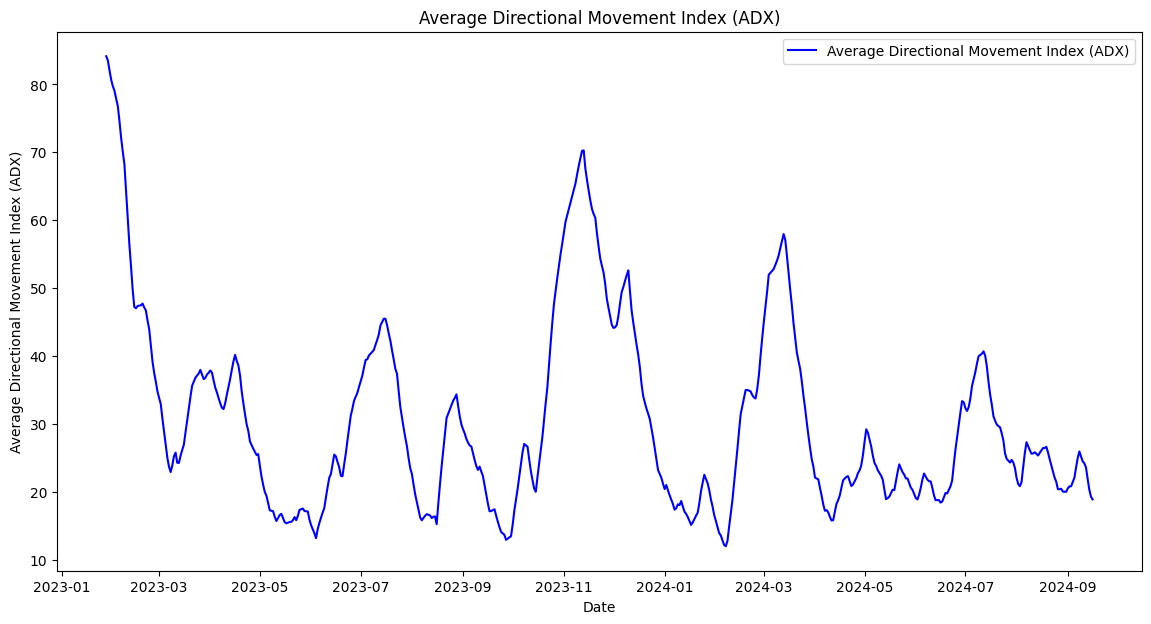

### Average Directional Movement Index Rating (ADXR)

**Average Directional Movement Index Rating (ADXR)** est la moyenne de l'ADX actuel et de l'ADX d'un certain nombre de périodes auparavant.


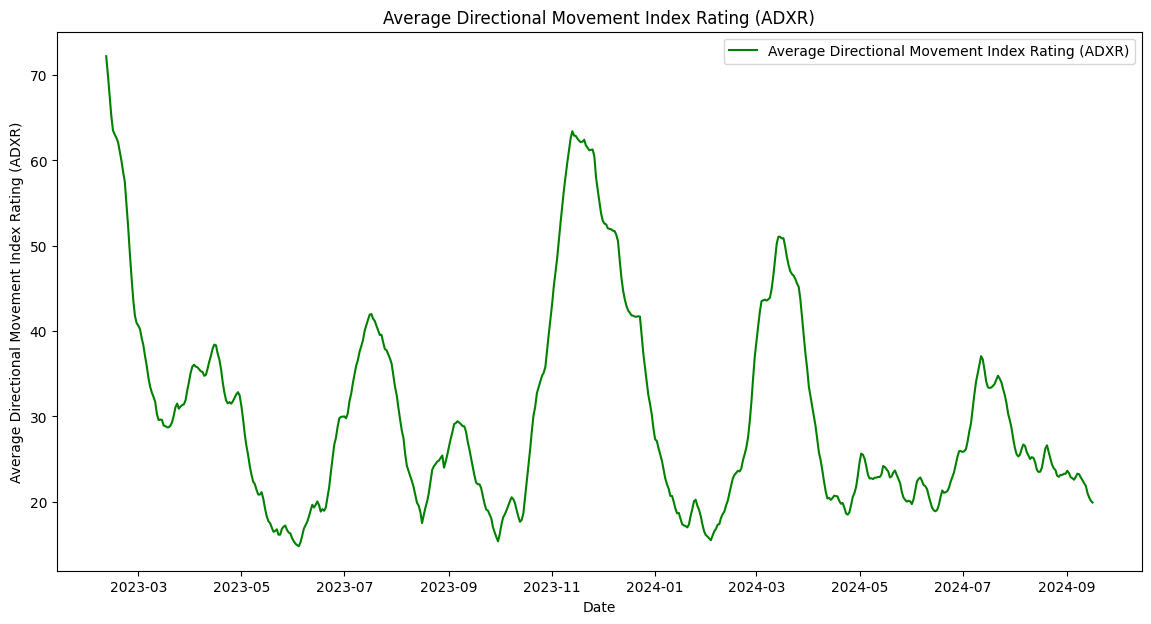

### Absolute Price Oscillator (APO)

**Absolute Price Oscillator (APO)** mesure la différence entre deux moyennes mobiles.


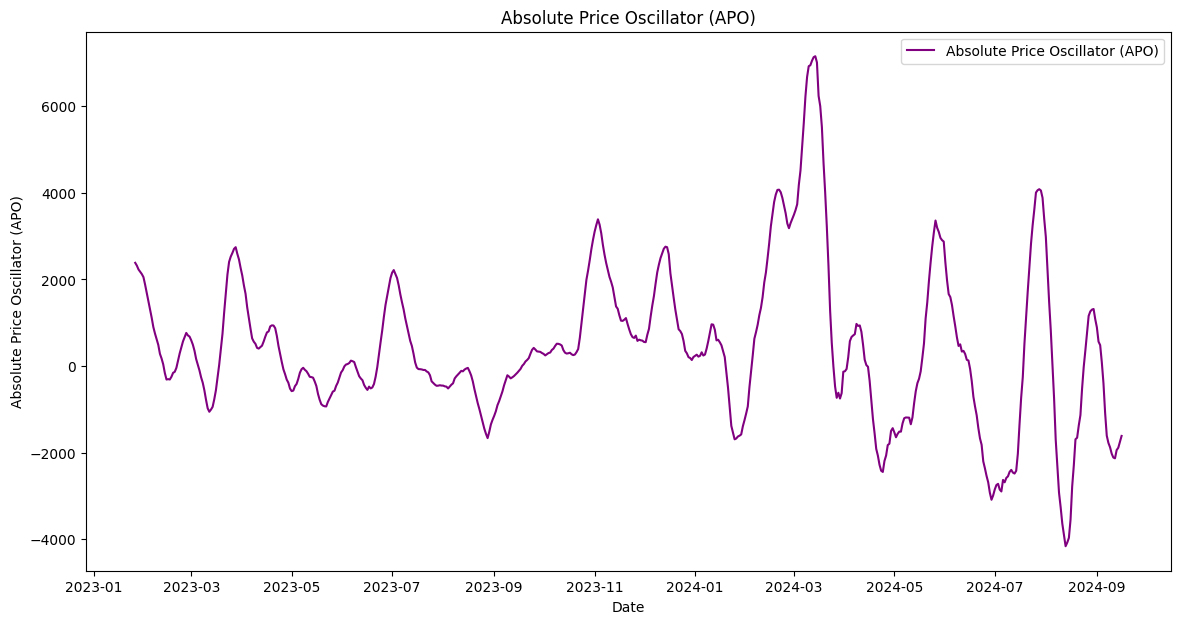

### Aroon

**Aroon** indique la force d'une tendance et la probabilité de sa continuation.


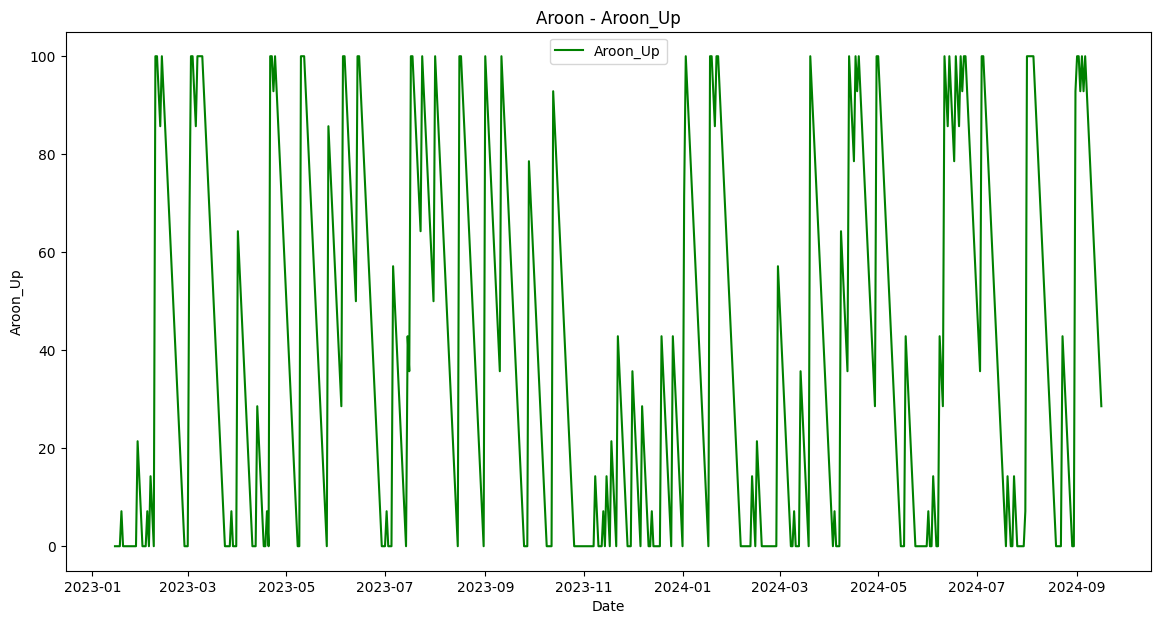

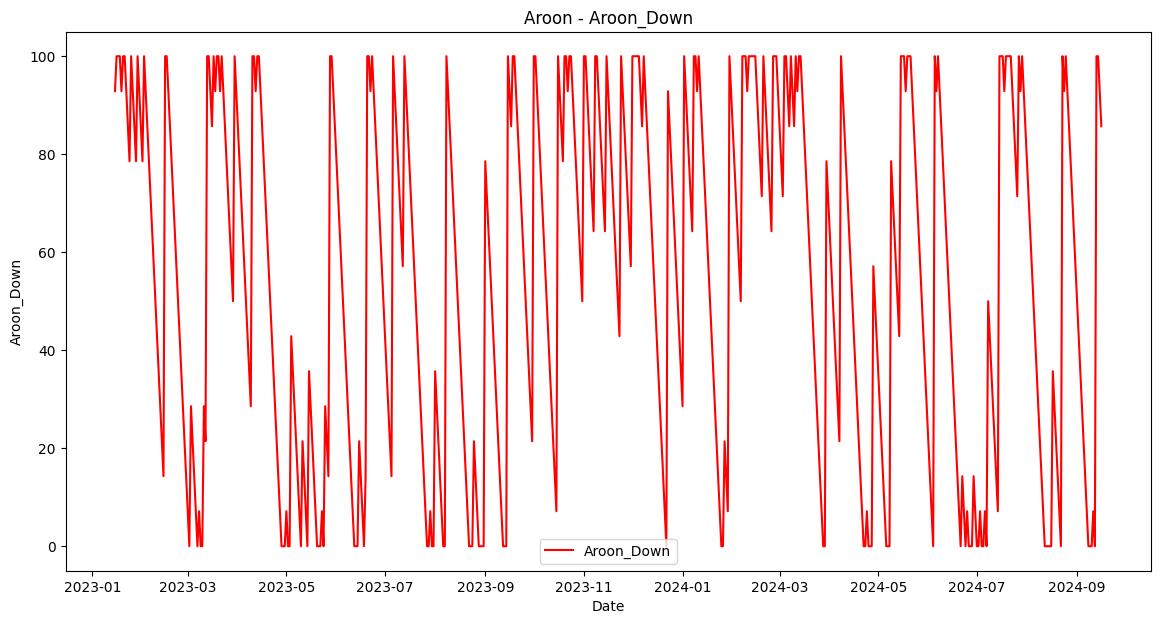

### Aroon Oscillator (AROONOSC)

**Aroon Oscillator (AROONOSC)** mesure la différence entre Aroon Up et Aroon Down.


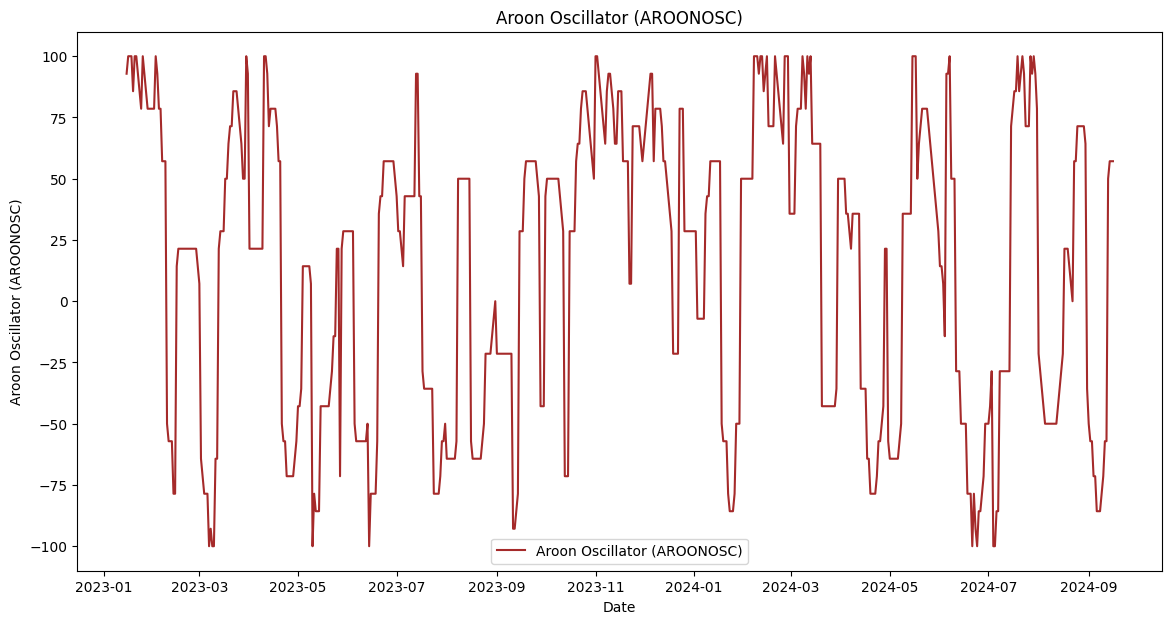

### Balance Of Power (BOP)

**Balance Of Power (BOP)** mesure la force de la pression d'achat et de vente.


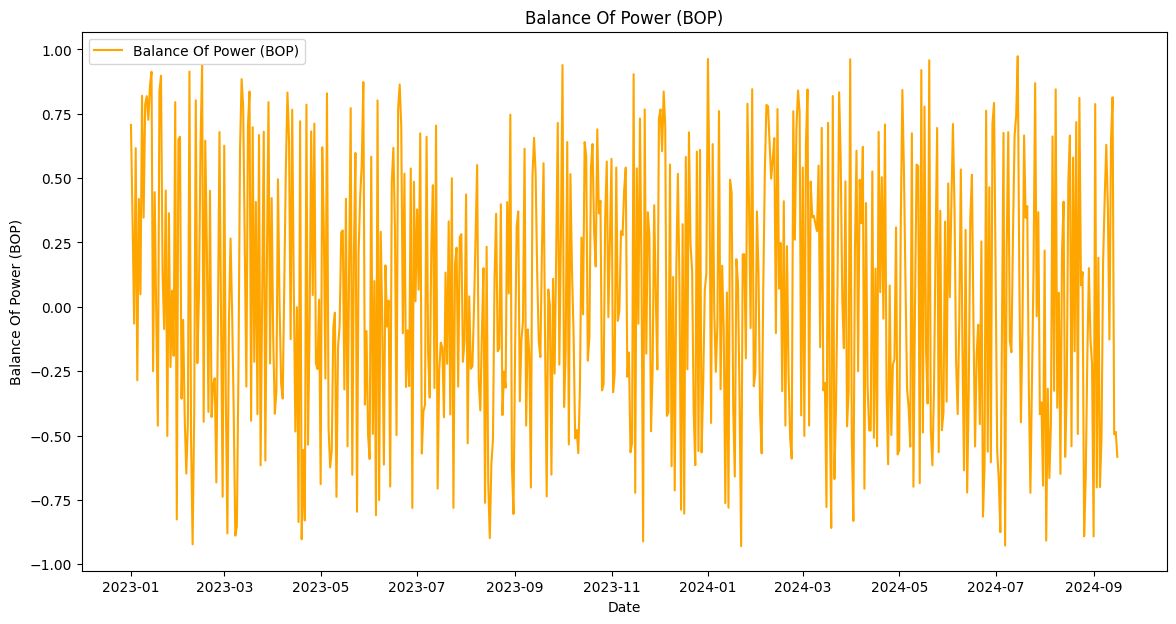

### Commodity Channel Index (CCI)

**Commodity Channel Index (CCI)** mesure la déviation du prix par rapport à sa moyenne statistique.


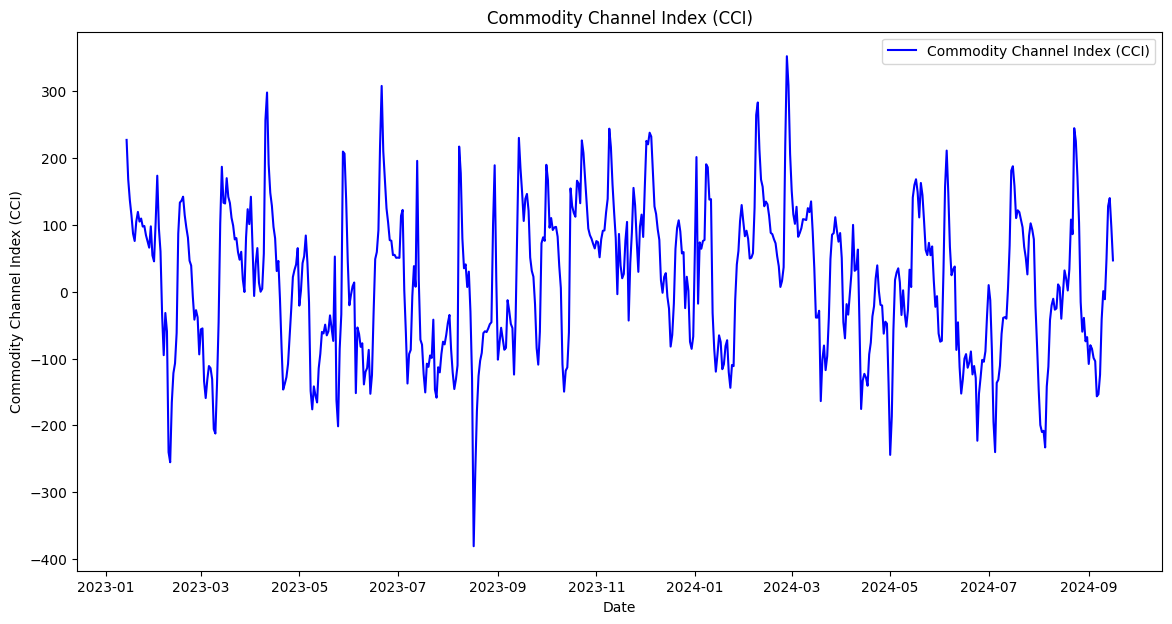

### Chande Momentum Oscillator (CMO)

**Chande Momentum Oscillator (CMO)** mesure la dynamique des variations de prix.


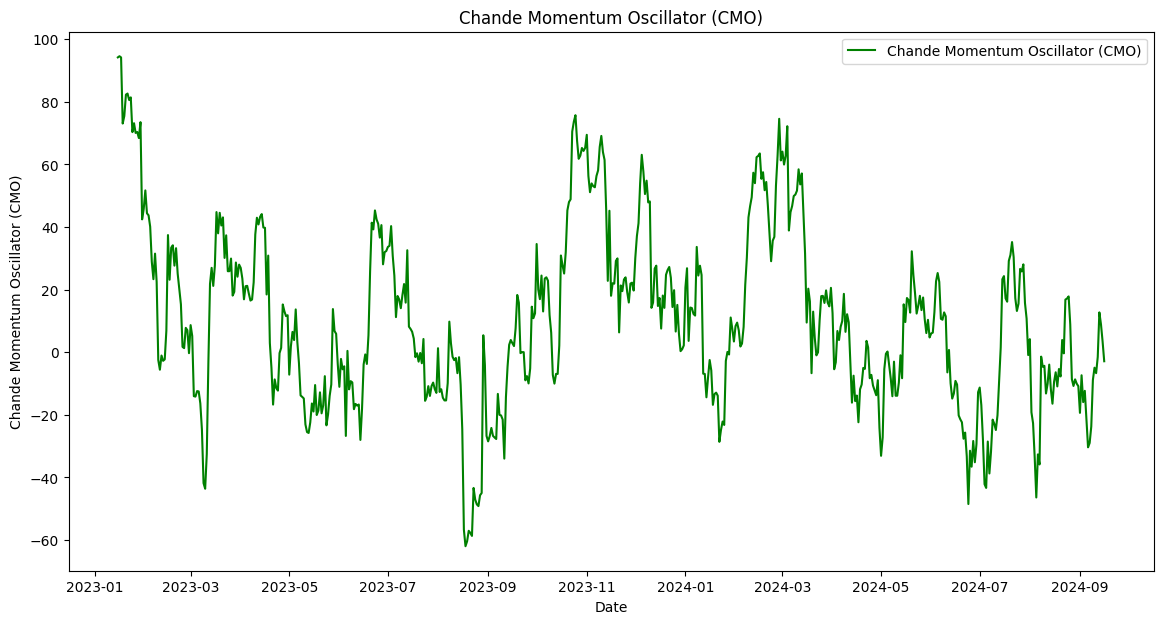

### Directional Movement Index (DX)

**Directional Movement Index (DX)** quantifie la force de la tendance.


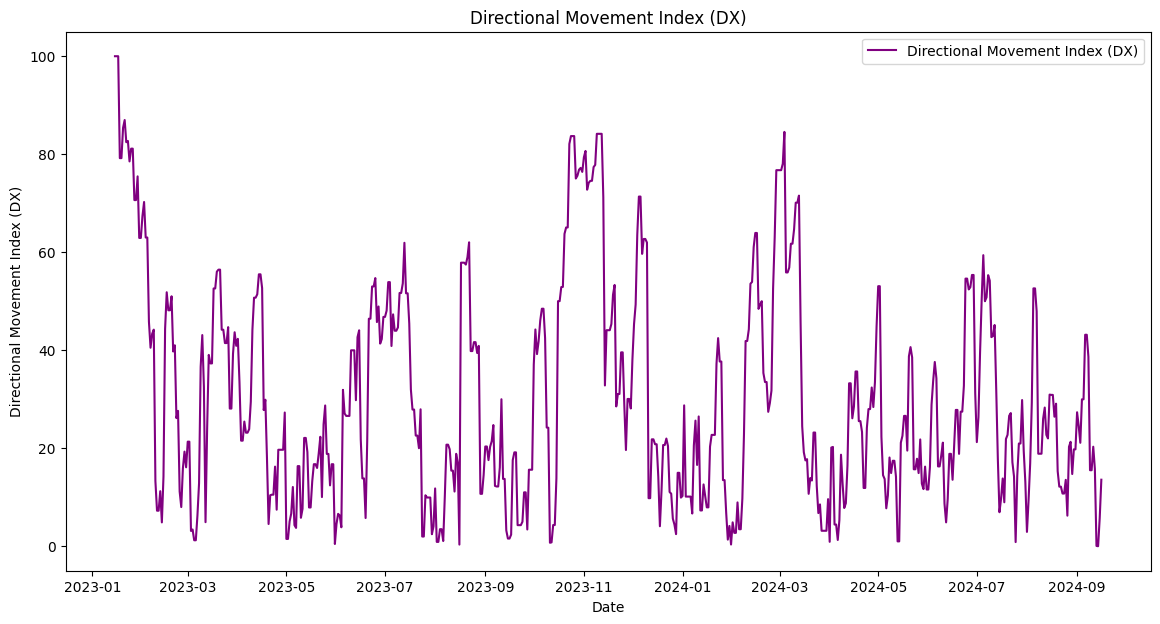

### Moving Average Convergence/Divergence (MACD)

**Moving Average Convergence/Divergence (MACD)** est un indicateur de tendance et de momentum qui montre la relation entre deux moyennes mobiles.


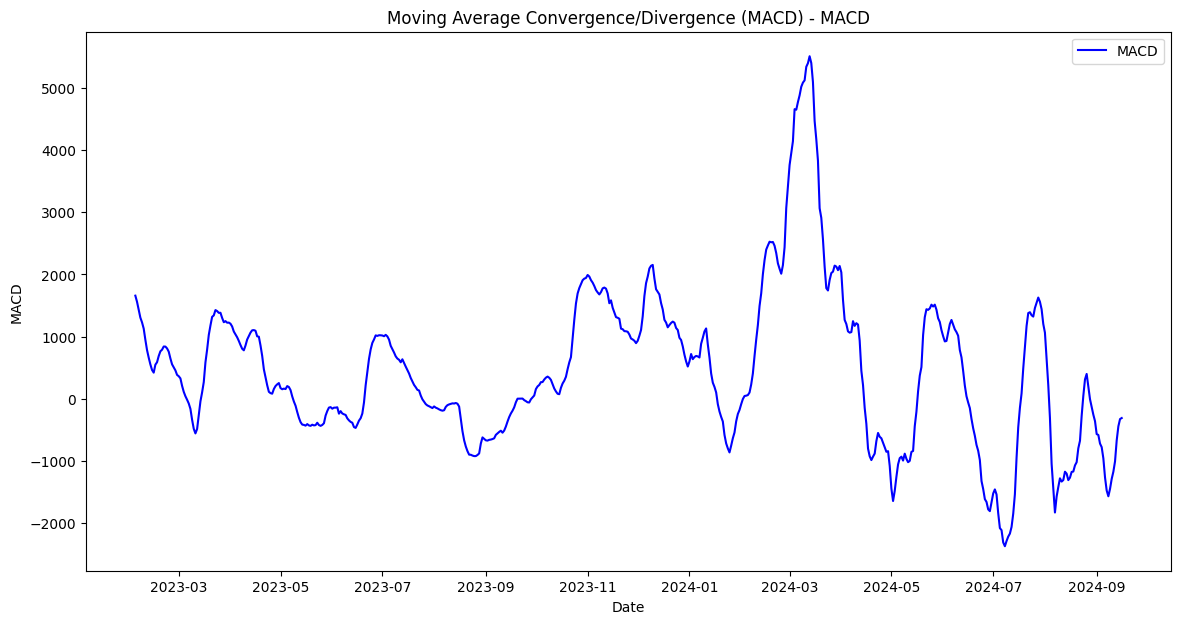

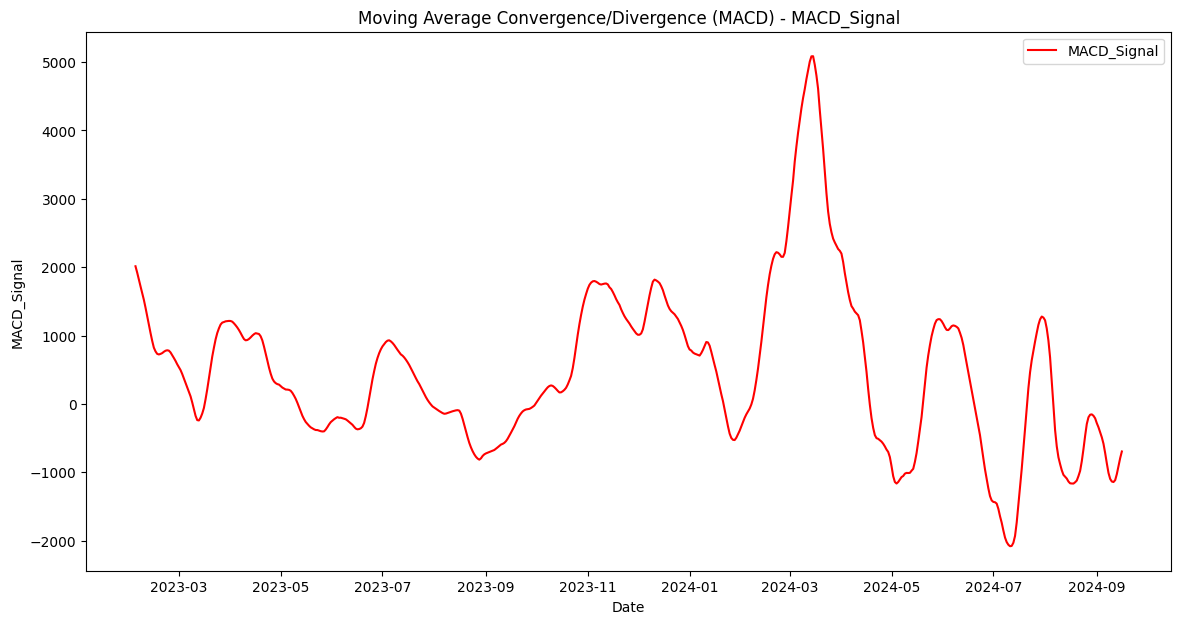

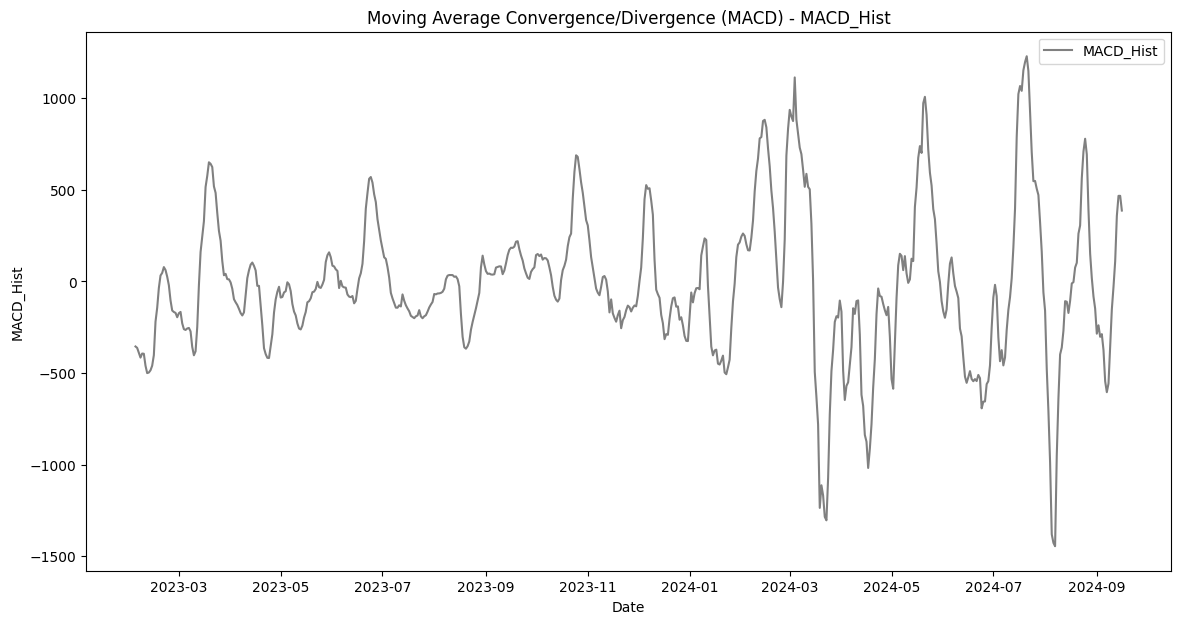

### MACD with Controllable MA Type (MACDEXT)

**MACD with Controllable MA Type (MACDEXT)** permet de contrôler les types de moyennes mobiles utilisées dans le calcul du MACD.


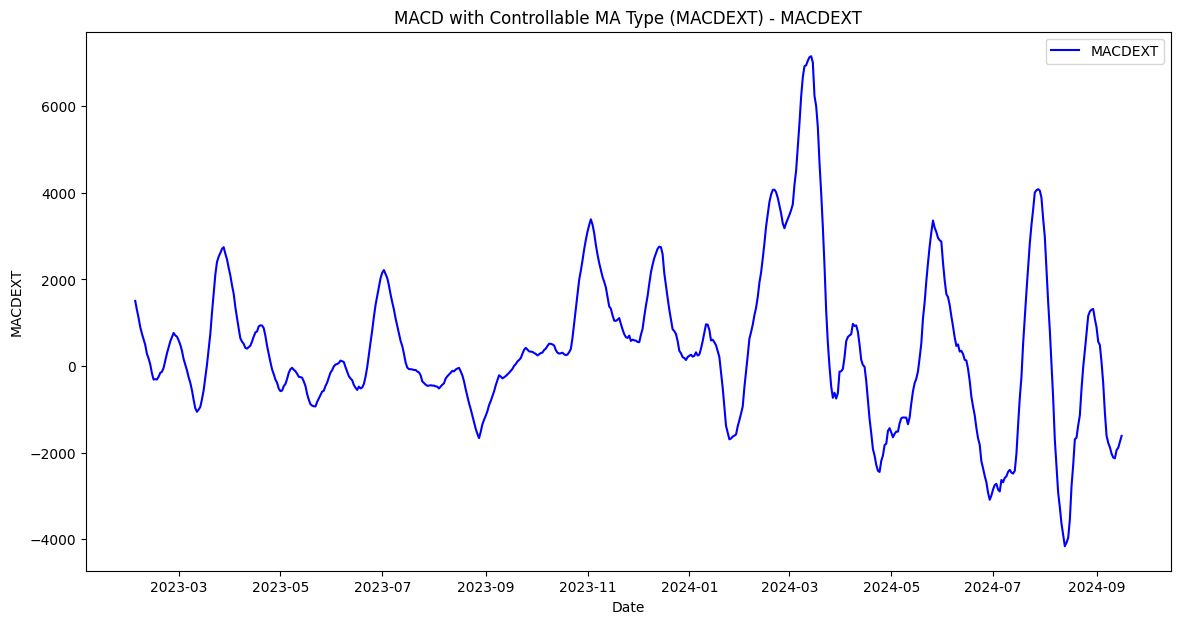

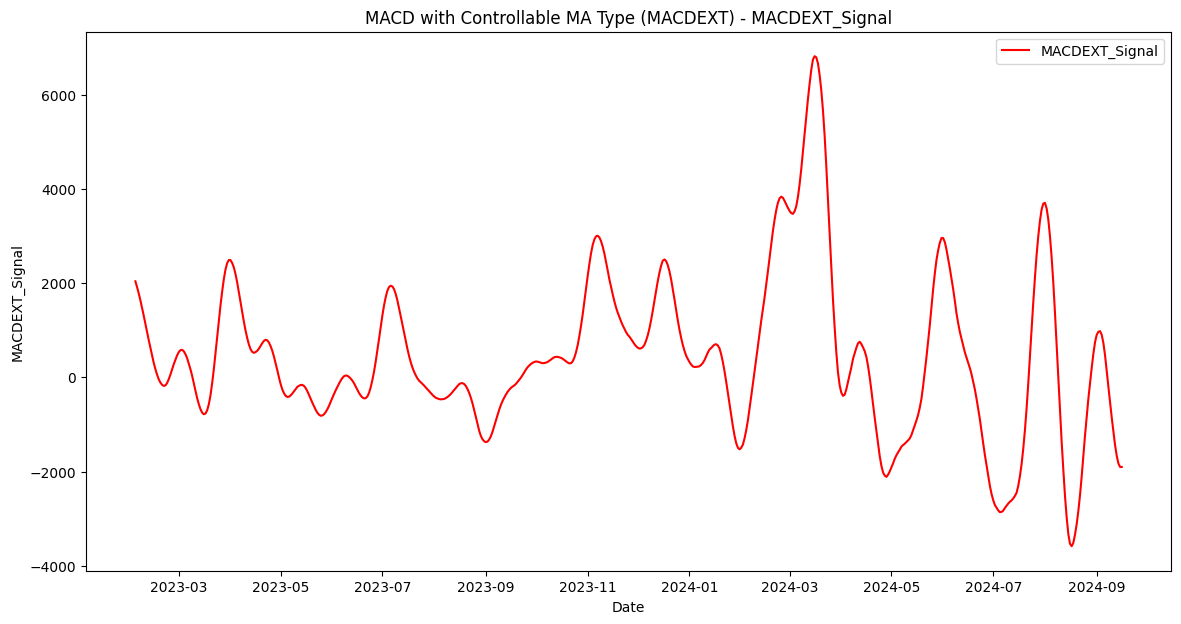

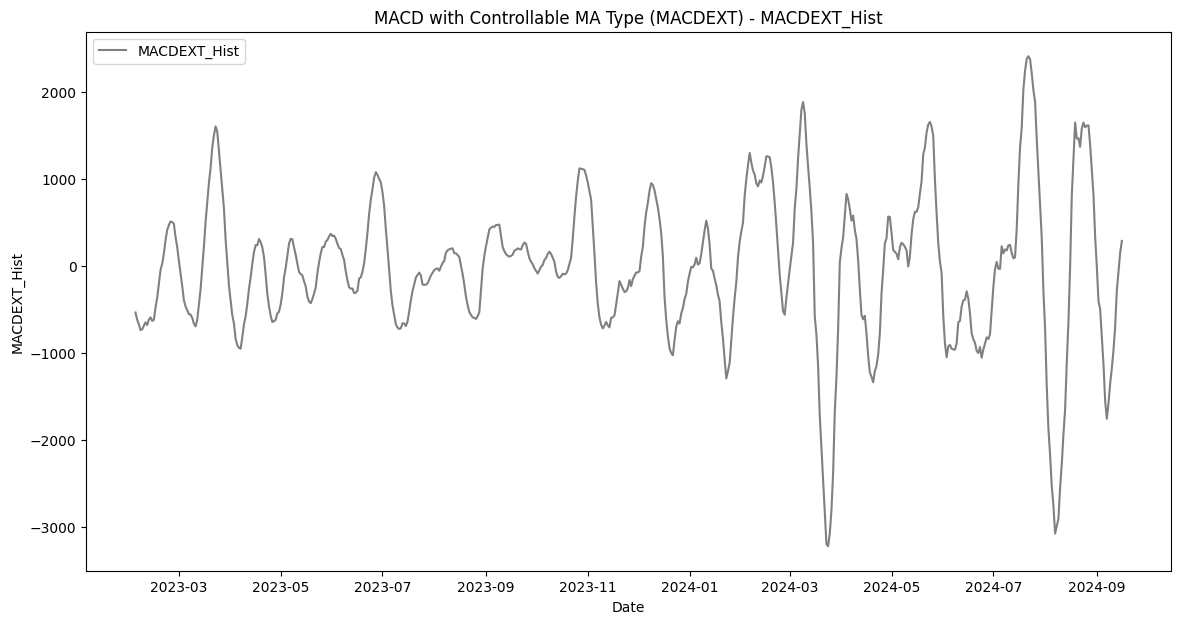

### Moving Average Convergence/Divergence Fix 12/26 (MACDFIX)

**Moving Average Convergence/Divergence Fix 12/26 (MACDFIX)** est une version fixe du MACD avec des périodes standard.


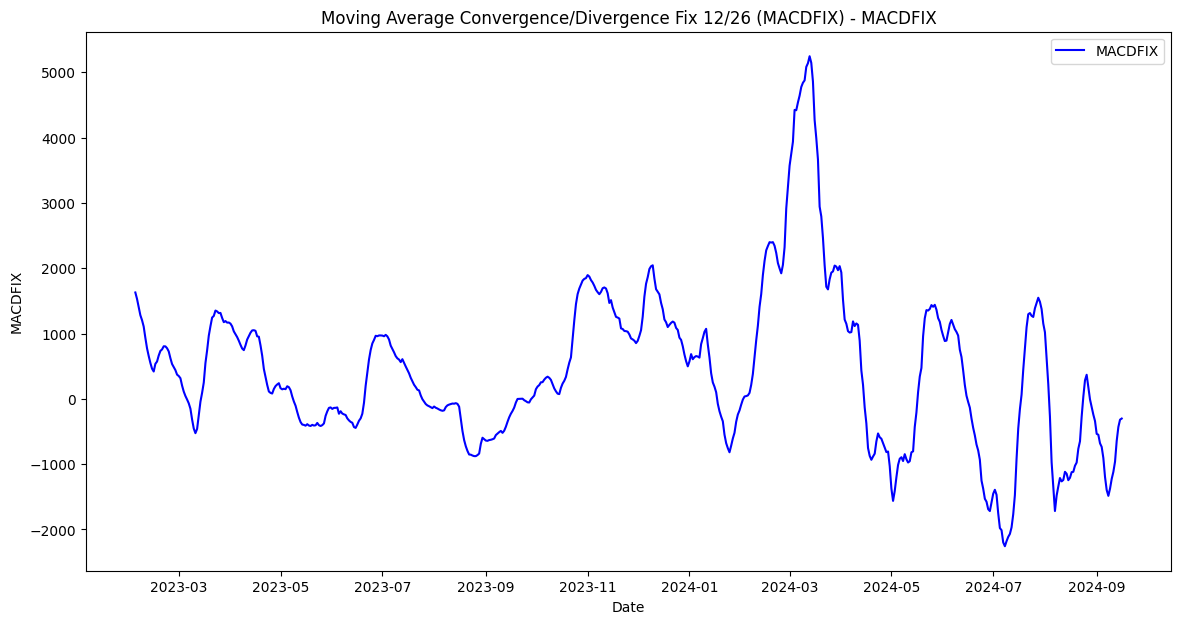

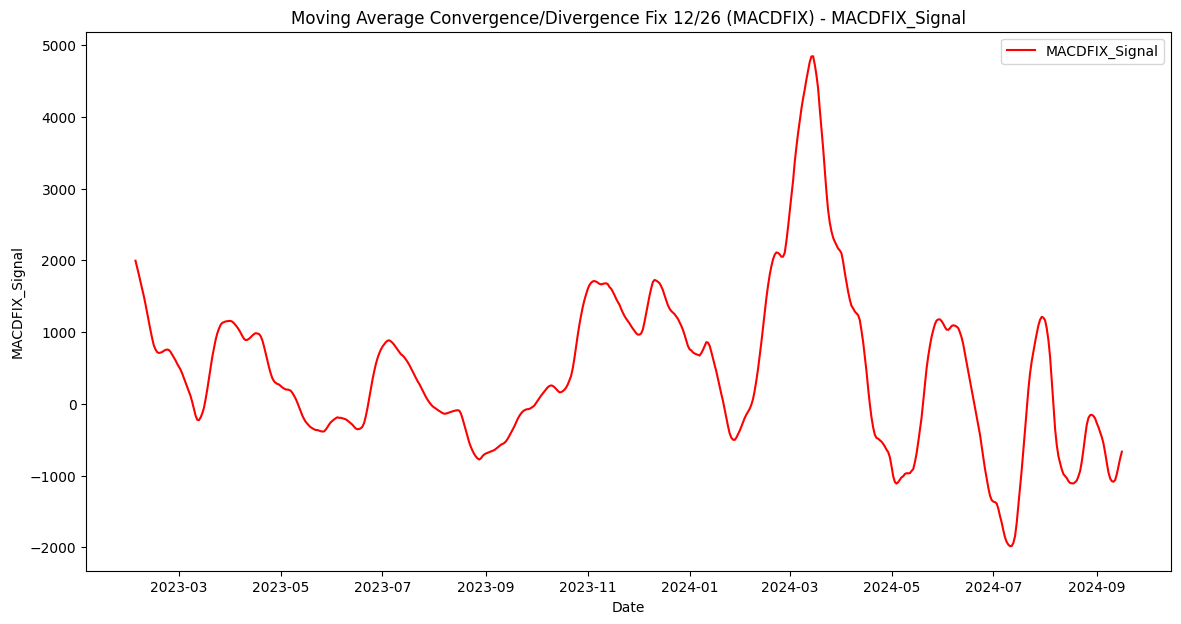

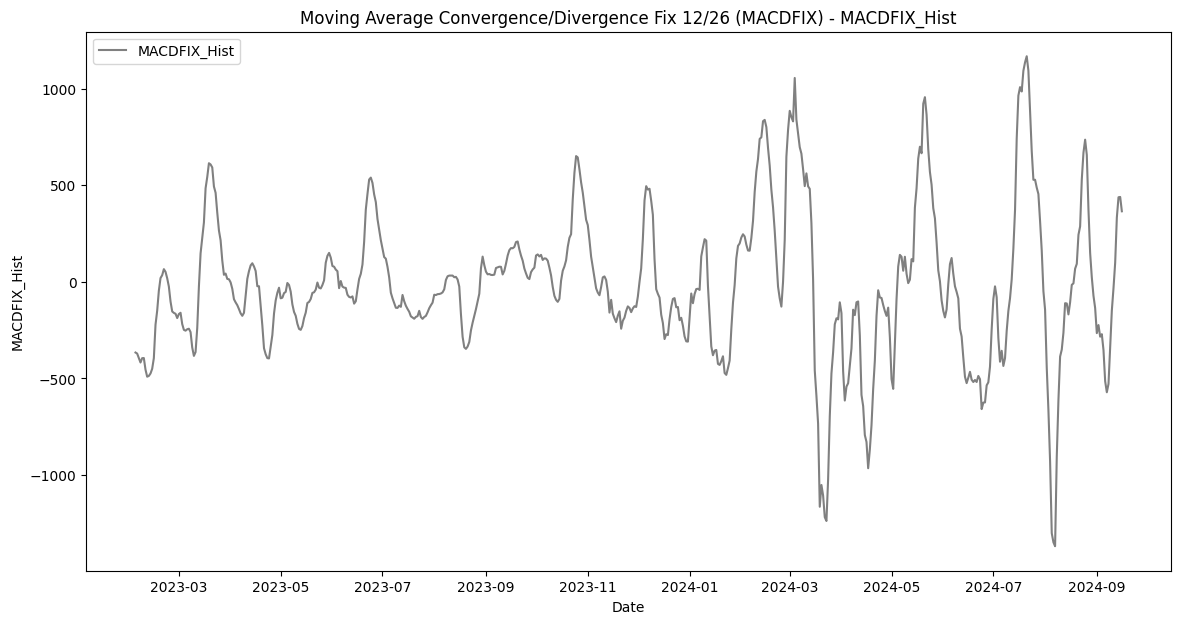

### Money Flow Index (MFI)

**Money Flow Index (MFI)** mesure les flux monétaires entrants et sortants d'un titre.


Erreur lors du calcul ou du traçage de l'indicateur Money Flow Index (MFI): input array type is not double


### Minus Directional Indicator (MINUS_DI)

**Minus Directional Indicator (MINUS_DI)** mesure la force de la tendance baissière.


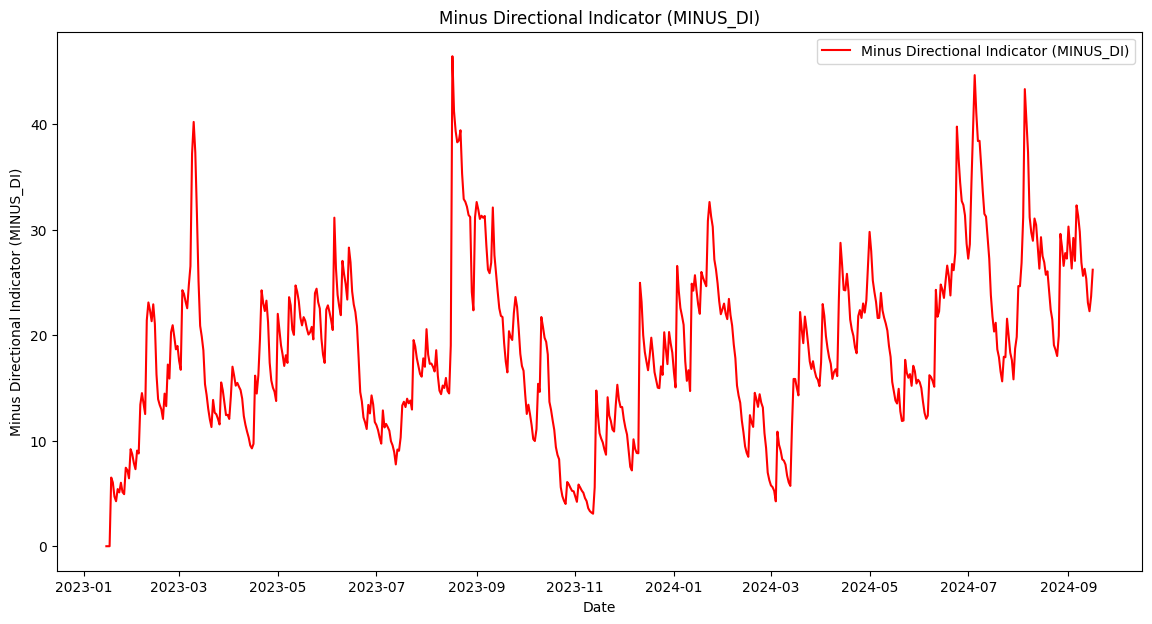

### Minus Directional Movement (MINUS_DM)

**Minus Directional Movement (MINUS_DM)** mesure le mouvement vers le bas.


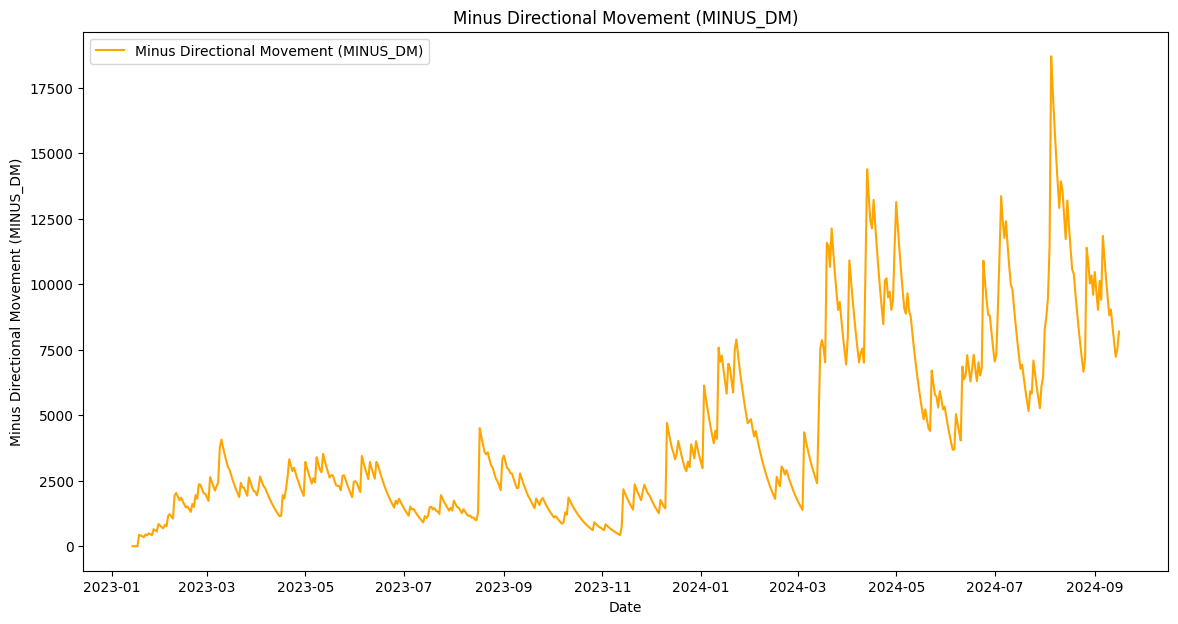

### Momentum (MOM)

**Momentum (MOM)** mesure la quantité par laquelle le prix d'un titre a changé sur une certaine période.


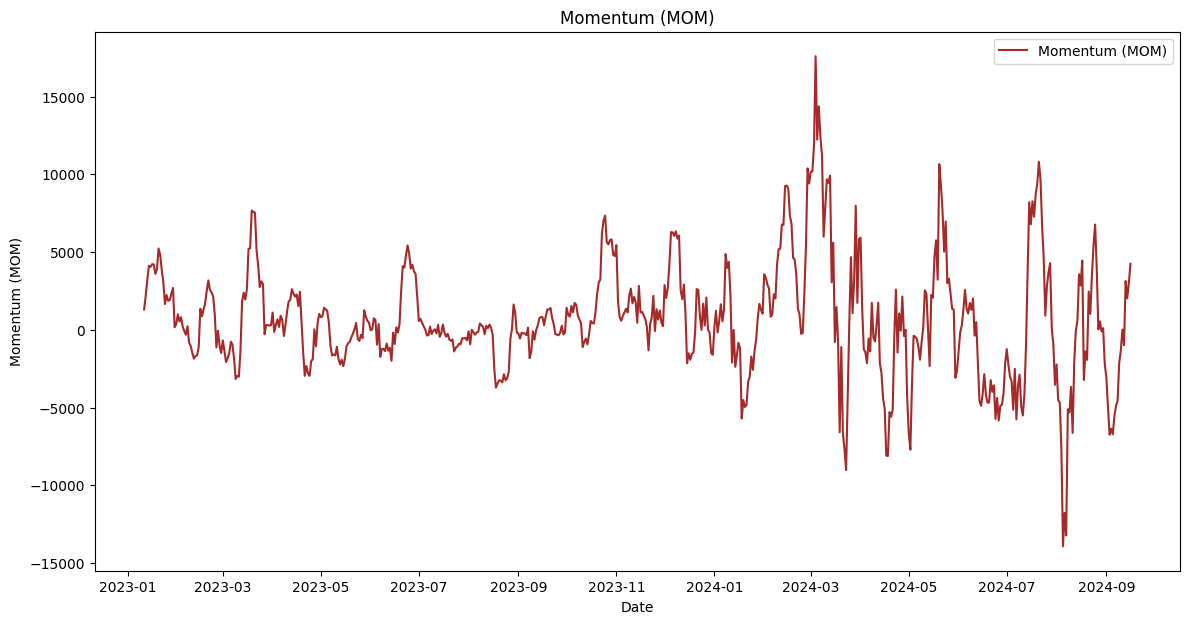

### Plus Directional Indicator (PLUS_DI)

**Plus Directional Indicator (PLUS_DI)** mesure la force de la tendance haussière.


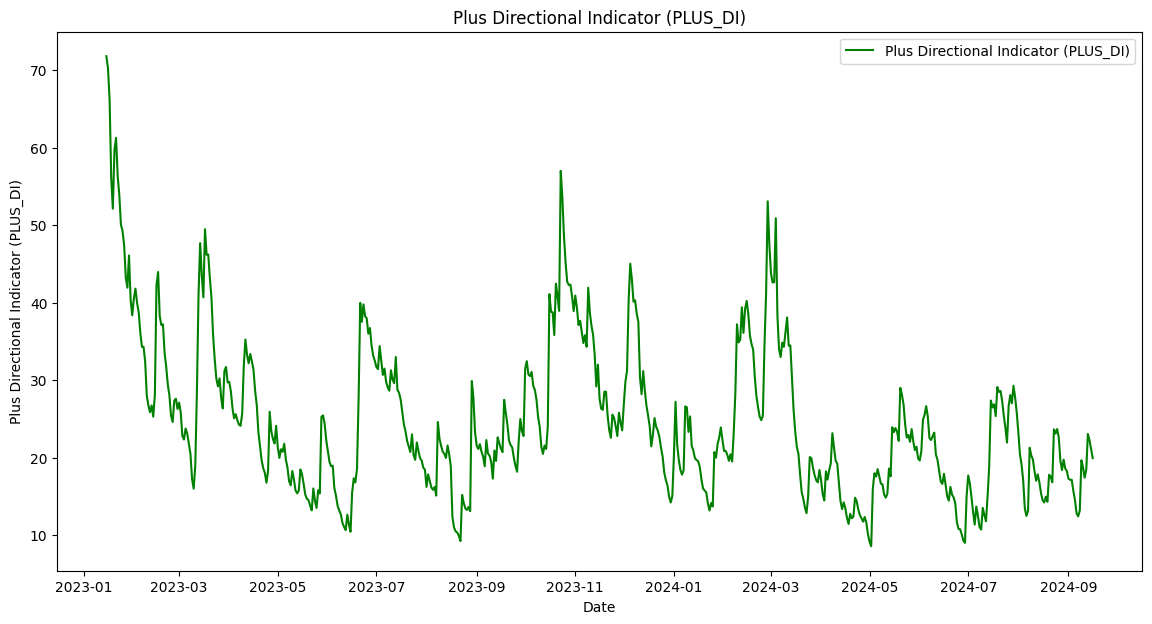

### Plus Directional Movement (PLUS_DM)

**Plus Directional Movement (PLUS_DM)** mesure le mouvement vers le haut.


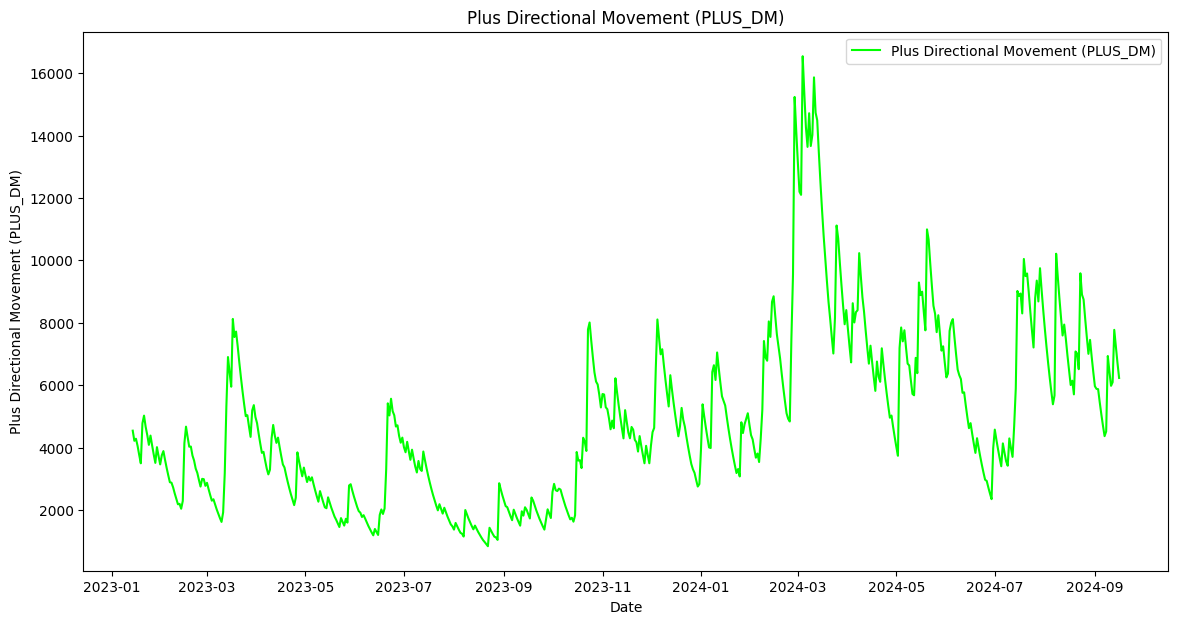

### Percentage Price Oscillator (PPO)

**Percentage Price Oscillator (PPO)** mesure la différence entre deux moyennes mobiles en pourcentage de la moyenne mobile la plus grande.


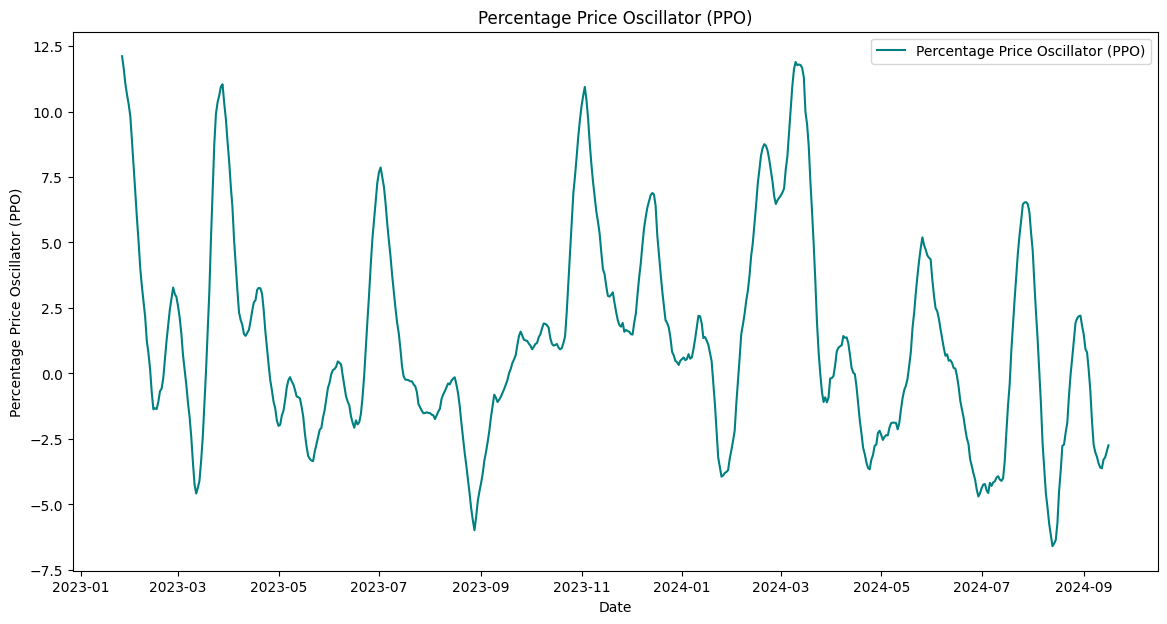

### Rate of Change (ROC)

**Rate of Change (ROC)** mesure le pourcentage de changement entre le prix actuel et le prix d'une certaine période auparavant.


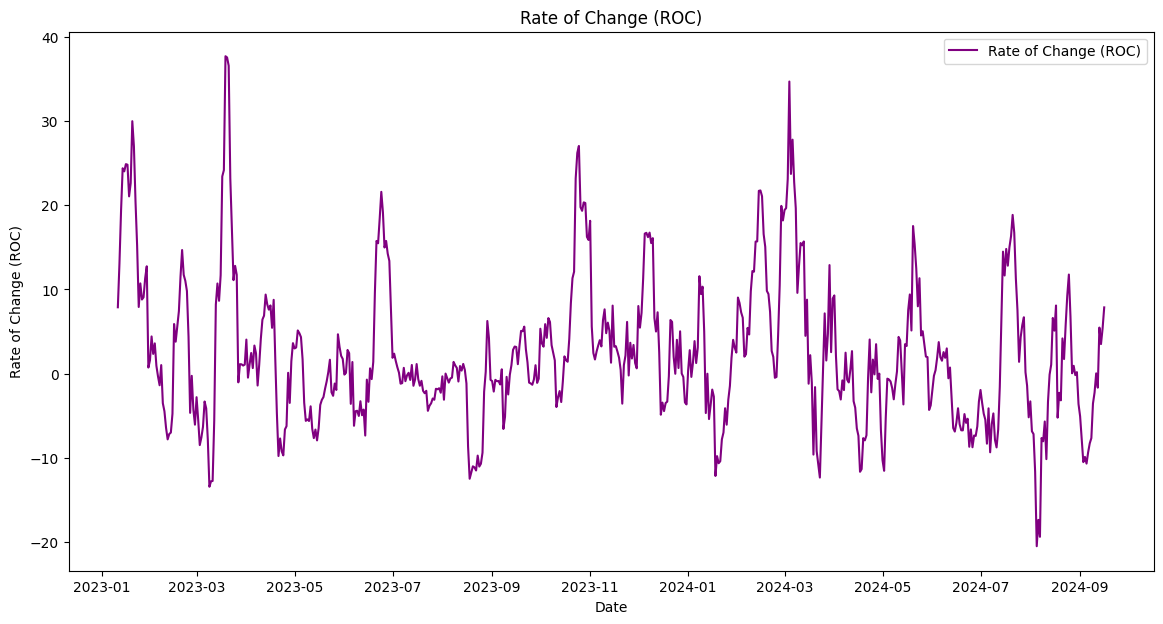

### Rate of Change Percentage (ROCP)

**Rate of Change Percentage (ROCP)** mesure le taux de changement du prix par rapport à sa valeur précédente.


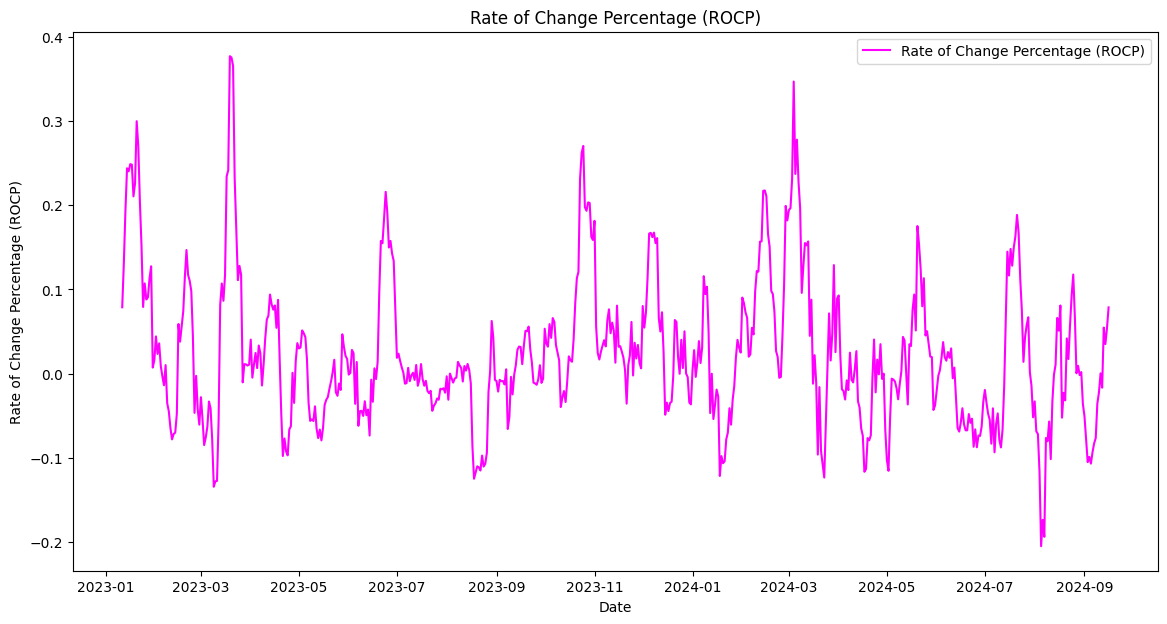

### Rate of Change Ratio (ROCR)

**Rate of Change Ratio (ROCR)** mesure le ratio du prix actuel par rapport au prix d'une certaine période auparavant.


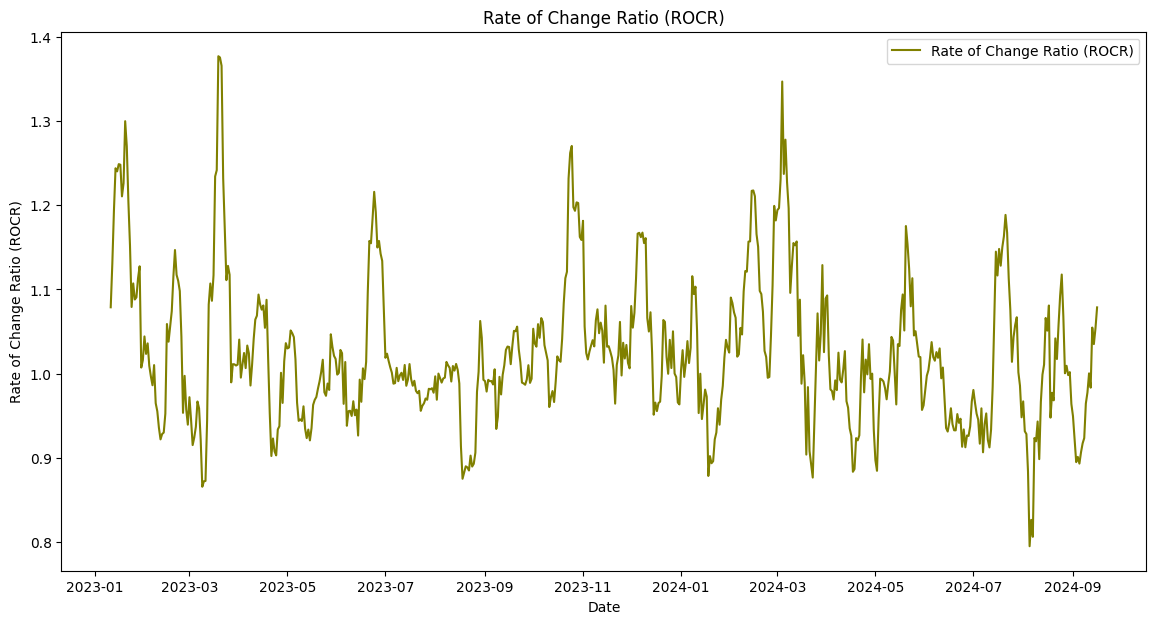

### Rate of Change Ratio 100 Scale (ROCR100)

**Rate of Change Ratio 100 Scale (ROCR100)** met à l'échelle le ROCR par 100.


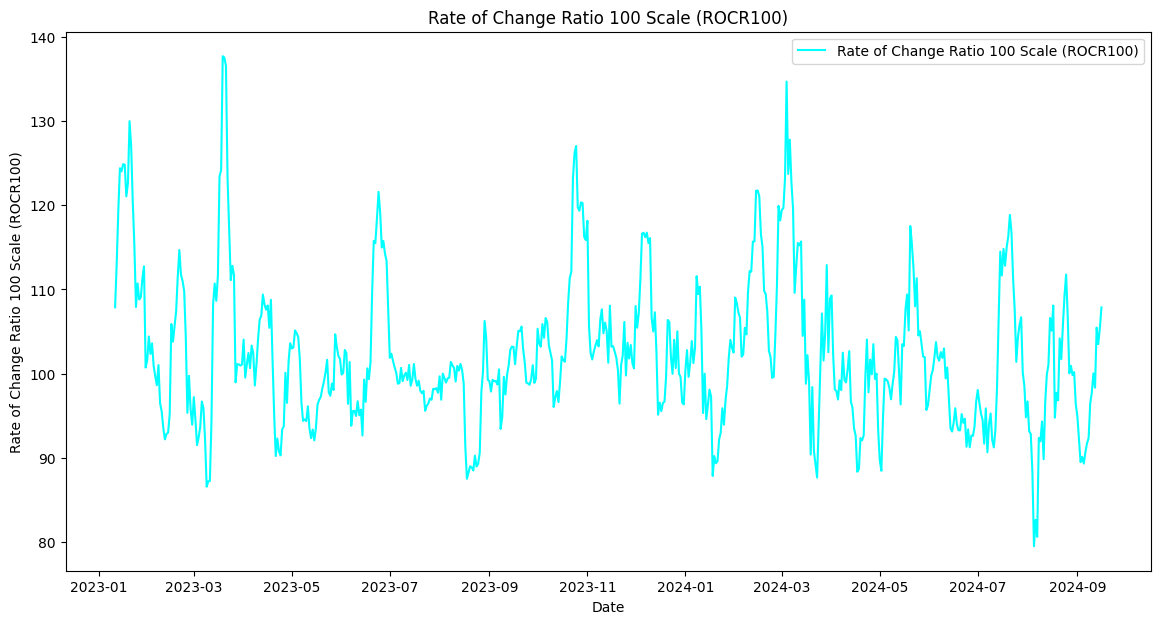

### Relative Strength Index (RSI)

**Relative Strength Index (RSI)** mesure la magnitude des récents changements de prix pour évaluer les conditions de surachat ou de survente.


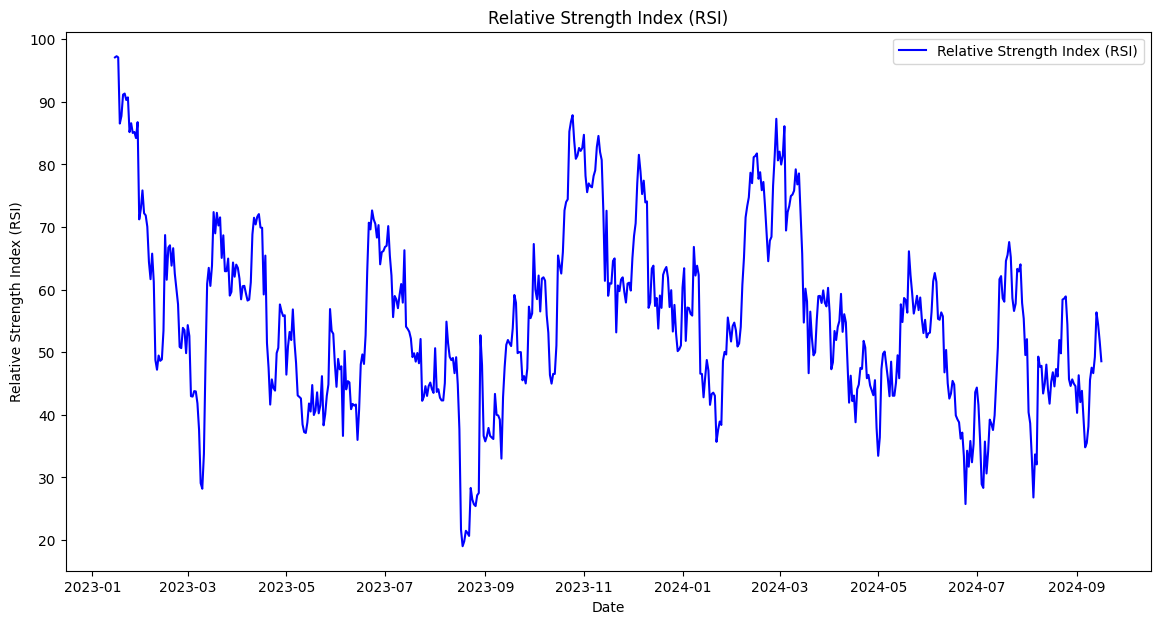

### Stochastic (STOCH)

**Stochastic (STOCH)** est un indicateur de momentum qui compare le prix de clôture actuel à une plage de ses prix sur une certaine période.


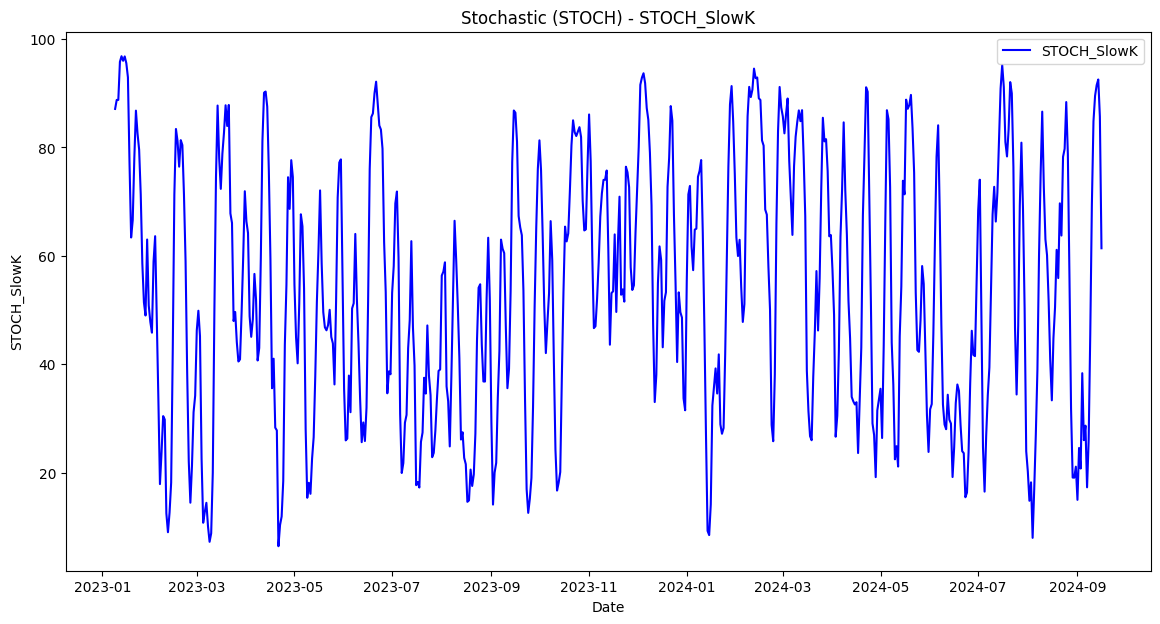

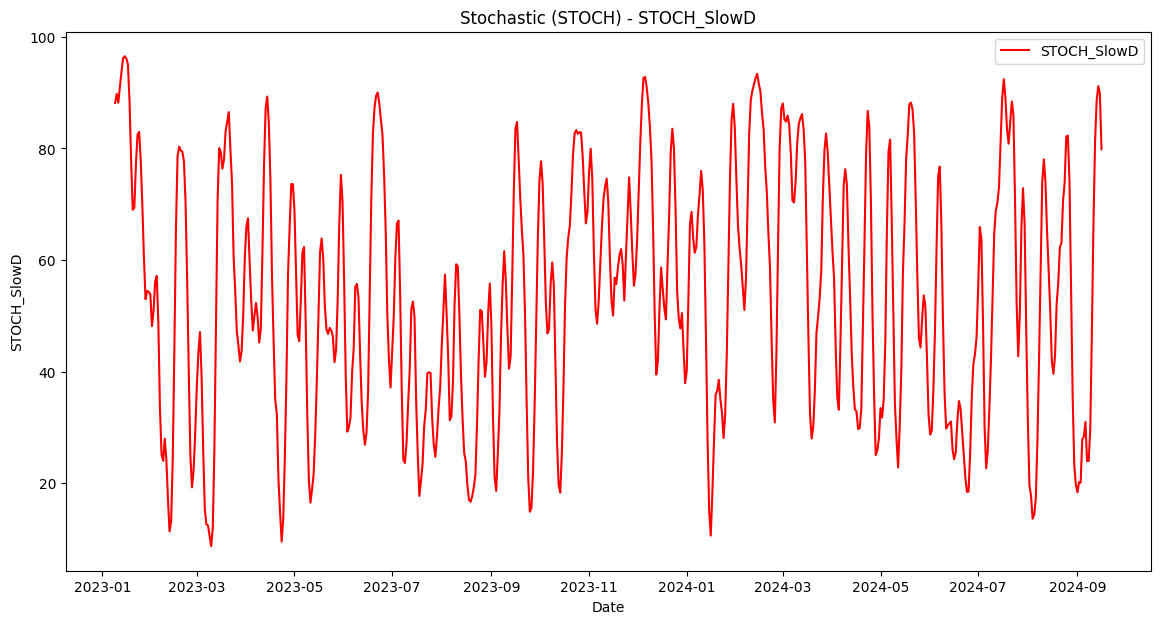

### Stochastic Fast (STOCHF)

**Stochastic Fast (STOCHF)** est une version plus rapide de l'oscillateur stochastique.


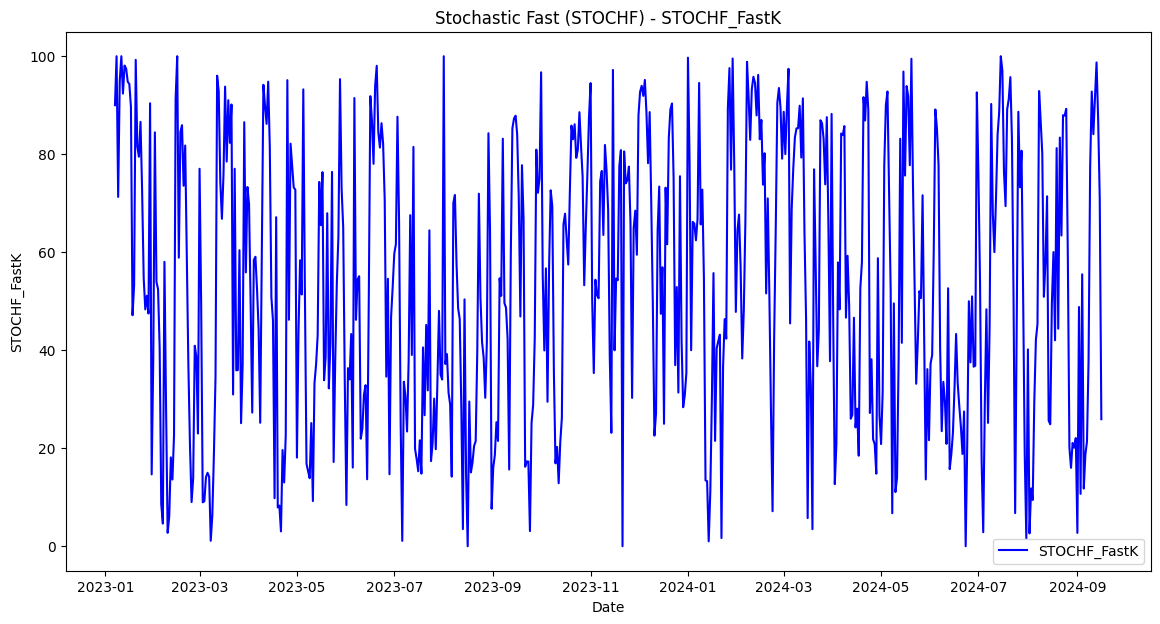

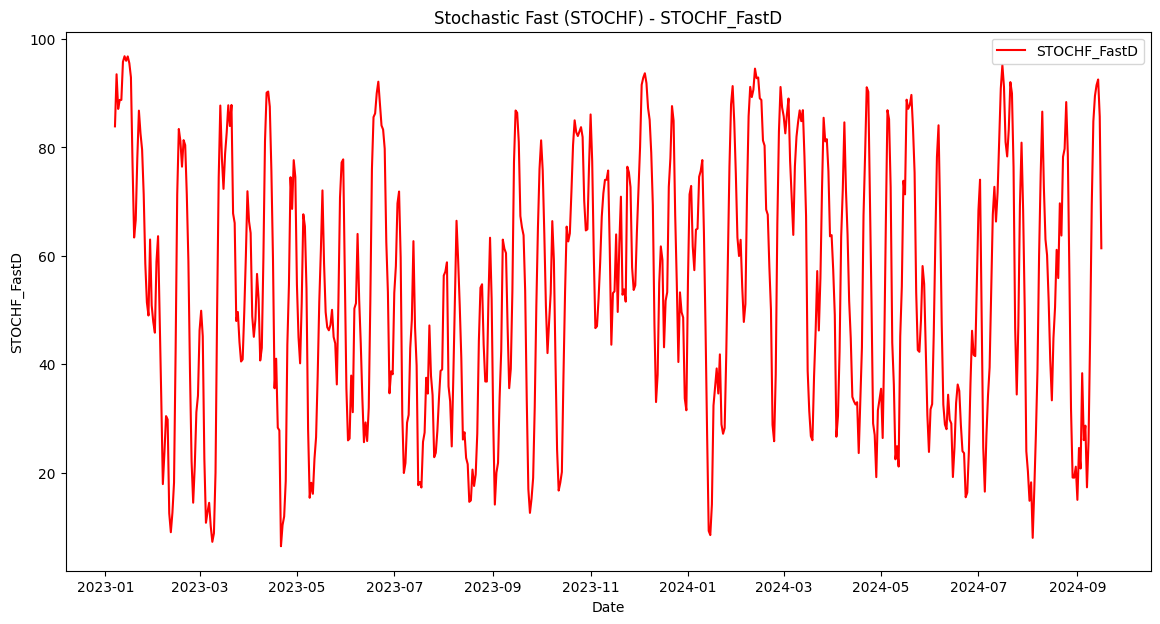

### Stochastic Relative Strength Index (STOCHRSI)

**Stochastic Relative Strength Index (STOCHRSI)** applique la formule de l'oscillateur stochastique aux valeurs RSI.


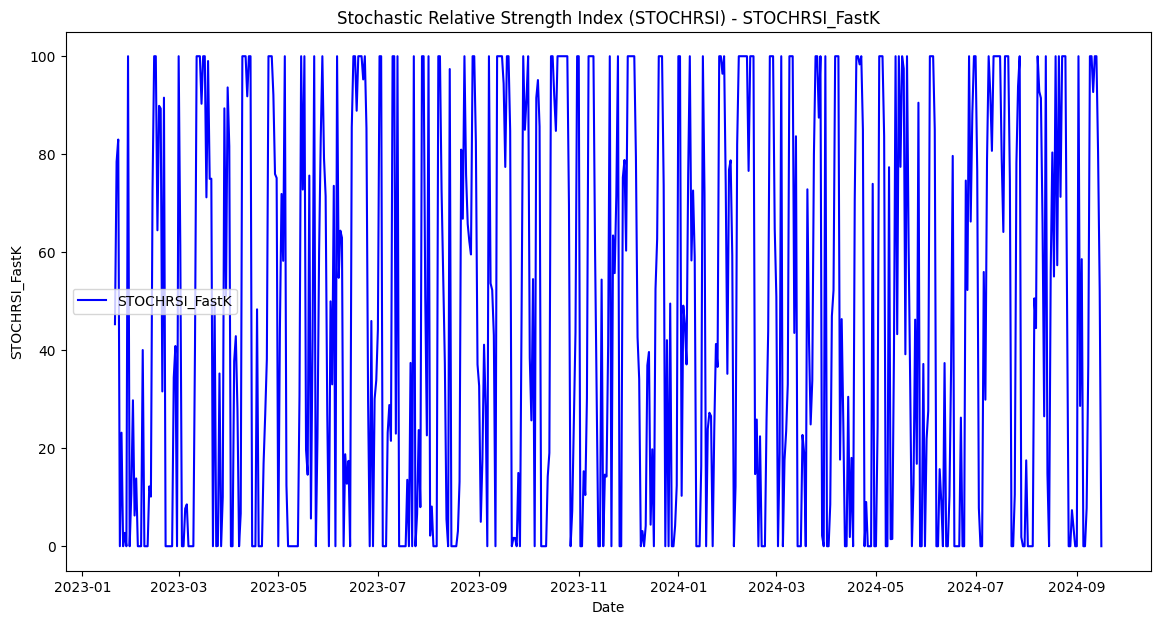

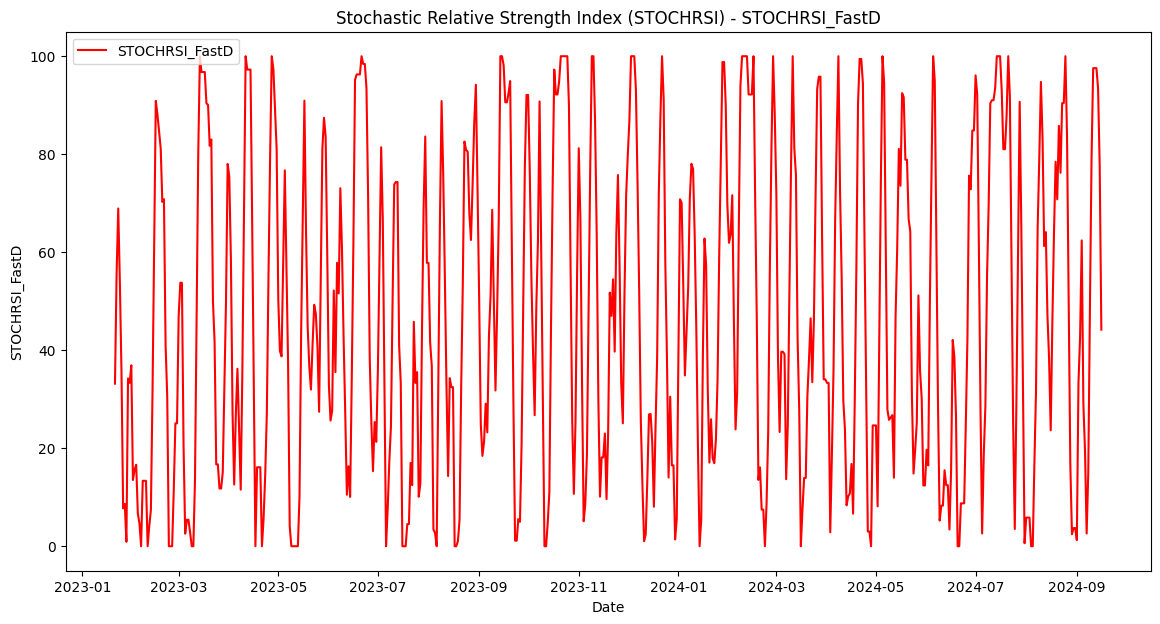

### 1-day Rate-Of-Change of a Triple Smooth EMA (TRIX)

**TRIX** est un indicateur de momentum qui montre le pourcentage de changement dans une moyenne mobile triple exponentielle lissée.


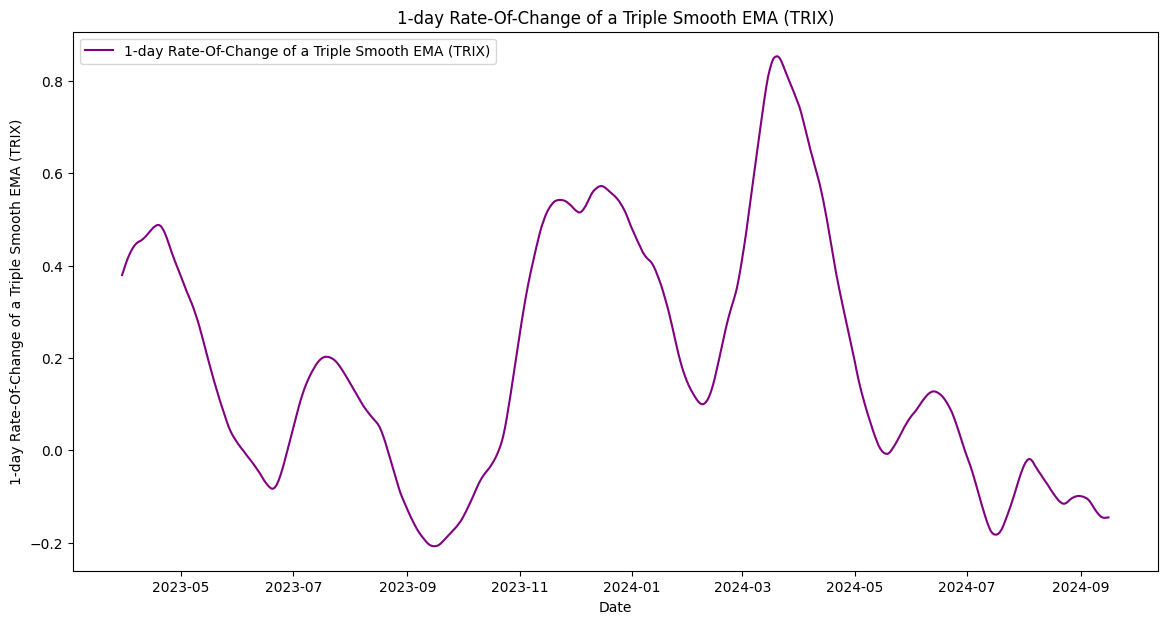

### Ultimate Oscillator (ULTOSC)

**Ultimate Oscillator (ULTOSC)** combine l'action des prix à court terme, intermédiaire et long terme en un seul oscillateur.


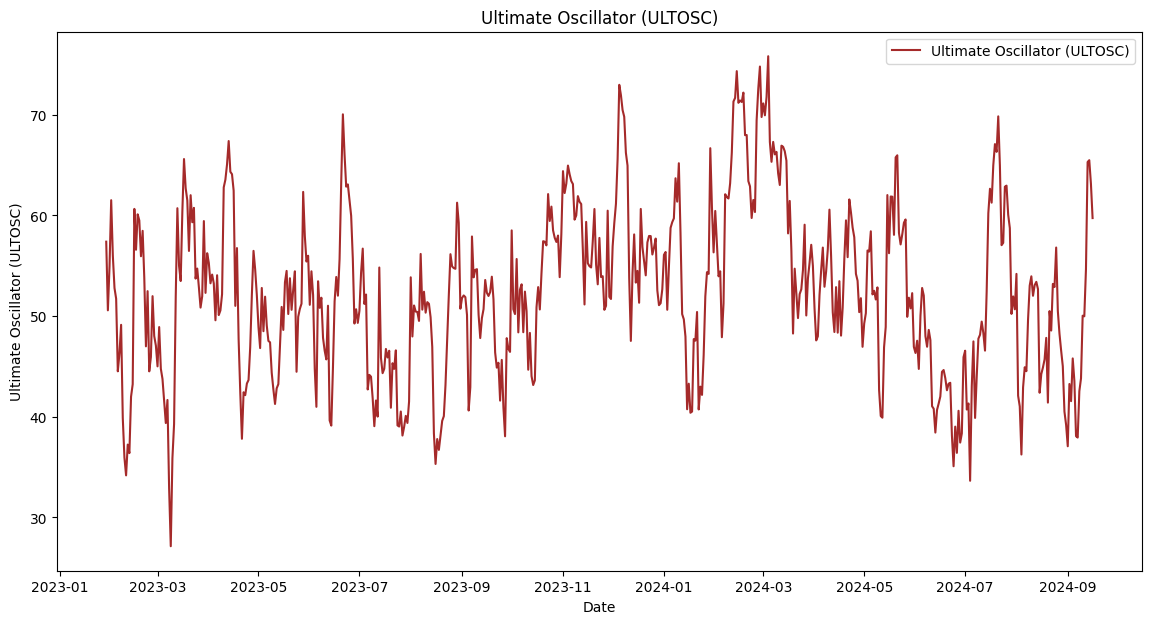

### Williams' %R (WILLR)

**Williams' %R (WILLR)** est un indicateur de momentum qui mesure les niveaux de surachat et de survente.


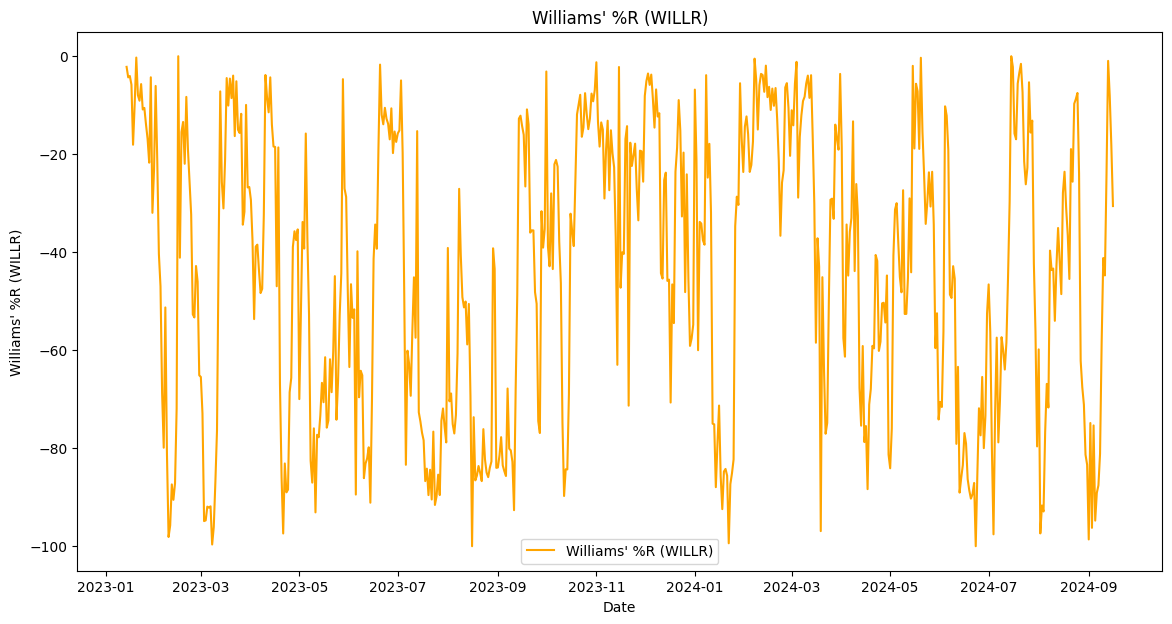

In [36]:
# Appeler la fonction pour calculer et tracer les indicateurs
compute_and_plot_indicators(data, indicators)
